In [1]:
%%capture
%run 00_Dataset.ipynb
%run 01_Data_Preparation.ipynb
%run 03_Model_RNN_BNN.ipynb

2022-04-28 10:02:25.957362: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-28 10:02:25.957422: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (spk): /proc/driver/nvidia/version does not exist
2022-04-28 10:02:25.958093: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Input pipeline

In [2]:
# prepare data generators using tf.data
train_dataset = (
    tf.data.Dataset.from_tensor_slices((z_train,mu_train))
    #.shuffle(TRAIN_LENGTH, reshuffle_each_iteration=True)
    .batch(BATCH_SIZE, drop_remainder=False)
);

#test_dataset = tf.data.Dataset.from_tensor_slices((z_test,mu_test)).batch(BATCH_SIZE);
val_dataset = (
    tf.data.Dataset.from_tensor_slices((z_val,mu_val))
    .batch(BATCH_SIZE, drop_remainder=False)
);

# Train

In [3]:
model = my_model()

In [4]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3), 
    loss = tf.keras.losses.MeanSquaredError(), 
    metrics = tf.keras.metrics.RootMeanSquaredError())

In [5]:
# Create a callback that saves the model's weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(out_dir,'cp.ckpt'), 
    monitor='val_loss', 
    save_weights_only=True, 
    verbose=1, 
    save_best_only=True
    )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-10
)

early_stopping = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=500,
        verbose=1
    )
]

model_history = model.fit(train_dataset,
                          epochs = EPOCHS,
                          validation_data = val_dataset,
                          callbacks = [checkpoint, early_stopping]
                          )

Epoch 1/10000
21/22 [===========================>..] - ETA: 0s - loss: 1633.2548 - root_mean_squared_error: 40.4135
Epoch 00001: val_loss improved from inf to 1557.62561, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 3s 35ms/step - loss: 1630.3177 - root_mean_squared_error: 40.3772 - val_loss: 1557.6256 - val_root_mean_squared_error: 39.4668
Epoch 2/10000
16/22 [====================>.........] - ETA: 0s - loss: 1426.2307 - root_mean_squared_error: 37.7655
Epoch 00002: val_loss improved from 1557.62561 to 1087.91785, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 1356.2664 - root_mean_squared_error: 36.8275 - val_loss: 1087.9178 - val_root_mean_squared_error: 32.9836
Epoch 3/10000
17/22 [======================>.......] - ETA: 0s - loss: 976.0596 - root_mean_squared_error: 31.2420 
Epoch 00003: val_loss improved from 1087.91785 to 815.27289, saving model to ../out/pantheon/cp.ckpt
22/22 [============

Epoch 23/10000
19/22 [========================>.....] - ETA: 0s - loss: 37.4907 - root_mean_squared_error: 6.1230
Epoch 00023: val_loss improved from 34.81344 to 33.89861, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 37.3421 - root_mean_squared_error: 6.1108 - val_loss: 33.8986 - val_root_mean_squared_error: 5.8223
Epoch 24/10000
18/22 [=======================>......] - ETA: 0s - loss: 37.8144 - root_mean_squared_error: 6.1493
Epoch 00024: val_loss improved from 33.89861 to 33.13904, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 36.9040 - root_mean_squared_error: 6.0749 - val_loss: 33.1390 - val_root_mean_squared_error: 5.7567
Epoch 25/10000
17/22 [======================>.......] - ETA: 0s - loss: 35.9934 - root_mean_squared_error: 5.9994
Epoch 00025: val_loss improved from 33.13904 to 32.49696, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0

Epoch 45/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.3615 - root_mean_squared_error: 5.5101
Epoch 00045: val_loss improved from 27.73410 to 27.63895, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 30.2452 - root_mean_squared_error: 5.4996 - val_loss: 27.6390 - val_root_mean_squared_error: 5.2573
Epoch 46/10000
17/22 [======================>.......] - ETA: 0s - loss: 31.2234 - root_mean_squared_error: 5.5878
Epoch 00046: val_loss improved from 27.63895 to 27.54689, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 31.1664 - root_mean_squared_error: 5.5827 - val_loss: 27.5469 - val_root_mean_squared_error: 5.2485
Epoch 47/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.0620 - root_mean_squared_error: 5.4829
Epoch 00047: val_loss improved from 27.54689 to 27.46542, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0

Epoch 67/10000
16/22 [====================>.........] - ETA: 0s - loss: 30.4549 - root_mean_squared_error: 5.5186
Epoch 00067: val_loss improved from 26.50025 to 26.47120, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 29.7522 - root_mean_squared_error: 5.4546 - val_loss: 26.4712 - val_root_mean_squared_error: 5.1450
Epoch 68/10000
17/22 [======================>.......] - ETA: 0s - loss: 29.9119 - root_mean_squared_error: 5.4692
Epoch 00068: val_loss improved from 26.47120 to 26.44425, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 29.9191 - root_mean_squared_error: 5.4698 - val_loss: 26.4443 - val_root_mean_squared_error: 5.1424
Epoch 69/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.8909 - root_mean_squared_error: 5.5580
Epoch 00069: val_loss improved from 26.44425 to 26.41605, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0

Epoch 89/10000
17/22 [======================>.......] - ETA: 0s - loss: 29.1546 - root_mean_squared_error: 5.3995
Epoch 00089: val_loss improved from 26.03776 to 26.02403, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 29.6166 - root_mean_squared_error: 5.4421 - val_loss: 26.0240 - val_root_mean_squared_error: 5.1014
Epoch 90/10000
16/22 [====================>.........] - ETA: 0s - loss: 30.3739 - root_mean_squared_error: 5.5113
Epoch 00090: val_loss improved from 26.02403 to 26.01015, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 29.2994 - root_mean_squared_error: 5.4129 - val_loss: 26.0101 - val_root_mean_squared_error: 5.1000
Epoch 91/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.6555 - root_mean_squared_error: 5.5367
Epoch 00091: val_loss improved from 26.01015 to 25.99600, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0

18/22 [=======================>......] - ETA: 0s - loss: 29.9511 - root_mean_squared_error: 5.4728
Epoch 00111: val_loss improved from 25.80155 to 25.79600, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 29.5486 - root_mean_squared_error: 5.4359 - val_loss: 25.7960 - val_root_mean_squared_error: 5.0790
Epoch 112/10000
18/22 [=======================>......] - ETA: 0s - loss: 29.9429 - root_mean_squared_error: 5.4720
Epoch 00112: val_loss improved from 25.79600 to 25.77461, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 29.3662 - root_mean_squared_error: 5.4191 - val_loss: 25.7746 - val_root_mean_squared_error: 5.0769
Epoch 113/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.0571 - root_mean_squared_error: 5.4824
Epoch 00113: val_loss improved from 25.77461 to 25.76543, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - 

16/22 [====================>.........] - ETA: 0s - loss: 29.9590 - root_mean_squared_error: 5.4735
Epoch 00133: val_loss improved from 25.62155 to 25.61281, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 30.1730 - root_mean_squared_error: 5.4930 - val_loss: 25.6128 - val_root_mean_squared_error: 5.0609
Epoch 134/10000
17/22 [======================>.......] - ETA: 0s - loss: 29.9029 - root_mean_squared_error: 5.4684
Epoch 00134: val_loss improved from 25.61281 to 25.60705, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 29.9953 - root_mean_squared_error: 5.4768 - val_loss: 25.6070 - val_root_mean_squared_error: 5.0603
Epoch 135/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.0127 - root_mean_squared_error: 5.4784
Epoch 00135: val_loss improved from 25.60705 to 25.60556, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - 

17/22 [======================>.......] - ETA: 0s - loss: 30.3912 - root_mean_squared_error: 5.5128
Epoch 00155: val_loss improved from 25.47355 to 25.46614, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 30.1207 - root_mean_squared_error: 5.4882 - val_loss: 25.4661 - val_root_mean_squared_error: 5.0464
Epoch 156/10000
17/22 [======================>.......] - ETA: 0s - loss: 28.7045 - root_mean_squared_error: 5.3577
Epoch 00156: val_loss did not improve from 25.46614
22/22 [==============================] - 0s 8ms/step - loss: 28.9366 - root_mean_squared_error: 5.3793 - val_loss: 25.4726 - val_root_mean_squared_error: 5.0470
Epoch 157/10000
17/22 [======================>.......] - ETA: 0s - loss: 29.0591 - root_mean_squared_error: 5.3906
Epoch 00157: val_loss did not improve from 25.46614
22/22 [==============================] - 0s 8ms/step - loss: 28.4196 - root_mean_squared_error: 5.3310 - val_loss: 25.4725 - val_root_mean_squared_

22/22 [==============================] - 0s 9ms/step - loss: 28.3611 - root_mean_squared_error: 5.3255 - val_loss: 25.3224 - val_root_mean_squared_error: 5.0321
Epoch 178/10000
19/22 [========================>.....] - ETA: 0s - loss: 29.5012 - root_mean_squared_error: 5.4315
Epoch 00178: val_loss improved from 25.32239 to 25.31623, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 29.4703 - root_mean_squared_error: 5.4287 - val_loss: 25.3162 - val_root_mean_squared_error: 5.0315
Epoch 179/10000
18/22 [=======================>......] - ETA: 0s - loss: 27.6013 - root_mean_squared_error: 5.2537
Epoch 00179: val_loss improved from 25.31623 to 25.30935, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 27.8967 - root_mean_squared_error: 5.2817 - val_loss: 25.3094 - val_root_mean_squared_error: 5.0308
Epoch 180/10000
17/22 [======================>.......] - ETA: 0s - loss: 29.9680 - root_mea

20/22 [==========================>...] - ETA: 0s - loss: 28.5286 - root_mean_squared_error: 5.3412
Epoch 00200: val_loss improved from 25.17470 to 25.16519, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 28.4937 - root_mean_squared_error: 5.3379 - val_loss: 25.1652 - val_root_mean_squared_error: 5.0165
Epoch 201/10000
21/22 [===========================>..] - ETA: 0s - loss: 28.7078 - root_mean_squared_error: 5.3580
Epoch 00201: val_loss improved from 25.16519 to 25.15619, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 28.5398 - root_mean_squared_error: 5.3423 - val_loss: 25.1562 - val_root_mean_squared_error: 5.0156
Epoch 202/10000
21/22 [===========================>..] - ETA: 0s - loss: 28.8374 - root_mean_squared_error: 5.3700
Epoch 00202: val_loss improved from 25.15619 to 25.15056, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - 

Epoch 223/10000
18/22 [=======================>......] - ETA: 0s - loss: 27.9420 - root_mean_squared_error: 5.2860
Epoch 00223: val_loss improved from 24.99570 to 24.98013, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 28.0223 - root_mean_squared_error: 5.2936 - val_loss: 24.9801 - val_root_mean_squared_error: 4.9980
Epoch 224/10000
17/22 [======================>.......] - ETA: 0s - loss: 27.9173 - root_mean_squared_error: 5.2837
Epoch 00224: val_loss improved from 24.98013 to 24.97724, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 27.4555 - root_mean_squared_error: 5.2398 - val_loss: 24.9772 - val_root_mean_squared_error: 4.9977
Epoch 225/10000
17/22 [======================>.......] - ETA: 0s - loss: 27.4232 - root_mean_squared_error: 5.2367
Epoch 00225: val_loss did not improve from 24.97724
22/22 [==============================] - 0s 8ms/step - loss: 26.9692 - root_mean_squa

Epoch 246/10000
17/22 [======================>.......] - ETA: 0s - loss: 28.7554 - root_mean_squared_error: 5.3624
Epoch 00246: val_loss improved from 24.78802 to 24.78757, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 28.7741 - root_mean_squared_error: 5.3641 - val_loss: 24.7876 - val_root_mean_squared_error: 4.9787
Epoch 247/10000
17/22 [======================>.......] - ETA: 0s - loss: 28.9644 - root_mean_squared_error: 5.3819
Epoch 00247: val_loss improved from 24.78757 to 24.76969, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 28.3565 - root_mean_squared_error: 5.3251 - val_loss: 24.7697 - val_root_mean_squared_error: 4.9769
Epoch 248/10000
17/22 [======================>.......] - ETA: 0s - loss: 30.1426 - root_mean_squared_error: 5.4902
Epoch 00248: val_loss improved from 24.76969 to 24.75946, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

Epoch 269/10000
21/22 [===========================>..] - ETA: 0s - loss: 27.2261 - root_mean_squared_error: 5.2179
Epoch 00269: val_loss improved from 24.58048 to 24.55560, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 27.1739 - root_mean_squared_error: 5.2129 - val_loss: 24.5556 - val_root_mean_squared_error: 4.9554
Epoch 270/10000
19/22 [========================>.....] - ETA: 0s - loss: 28.9388 - root_mean_squared_error: 5.3795
Epoch 00270: val_loss improved from 24.55560 to 24.54722, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 28.8145 - root_mean_squared_error: 5.3679 - val_loss: 24.5472 - val_root_mean_squared_error: 4.9545
Epoch 271/10000
19/22 [========================>.....] - ETA: 0s - loss: 28.5614 - root_mean_squared_error: 5.3443
Epoch 00271: val_loss improved from 24.54722 to 24.53590, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

19/22 [========================>.....] - ETA: 0s - loss: 28.1801 - root_mean_squared_error: 5.3085
Epoch 00291: val_loss improved from 24.33909 to 24.32842, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 27.7813 - root_mean_squared_error: 5.2708 - val_loss: 24.3284 - val_root_mean_squared_error: 4.9324
Epoch 292/10000
18/22 [=======================>......] - ETA: 0s - loss: 28.3940 - root_mean_squared_error: 5.3286
Epoch 00292: val_loss improved from 24.32842 to 24.31684, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 27.6456 - root_mean_squared_error: 5.2579 - val_loss: 24.3168 - val_root_mean_squared_error: 4.9312
Epoch 293/10000
17/22 [======================>.......] - ETA: 0s - loss: 28.0807 - root_mean_squared_error: 5.2991
Epoch 00293: val_loss improved from 24.31684 to 24.31020, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - 

16/22 [====================>.........] - ETA: 0s - loss: 27.2778 - root_mean_squared_error: 5.2228
Epoch 00313: val_loss improved from 24.10414 to 24.08994, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 27.4330 - root_mean_squared_error: 5.2377 - val_loss: 24.0899 - val_root_mean_squared_error: 4.9082
Epoch 314/10000
18/22 [=======================>......] - ETA: 0s - loss: 28.7644 - root_mean_squared_error: 5.3632
Epoch 00314: val_loss improved from 24.08994 to 24.07898, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 28.4934 - root_mean_squared_error: 5.3379 - val_loss: 24.0790 - val_root_mean_squared_error: 4.9070
Epoch 315/10000
20/22 [==========================>...] - ETA: 0s - loss: 28.5075 - root_mean_squared_error: 5.3392
Epoch 00315: val_loss improved from 24.07898 to 24.06624, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - 

22/22 [==============================] - 0s 9ms/step - loss: 25.8496 - root_mean_squared_error: 5.0842 - val_loss: 23.8433 - val_root_mean_squared_error: 4.8830
Epoch 336/10000
17/22 [======================>.......] - ETA: 0s - loss: 27.5738 - root_mean_squared_error: 5.2511
Epoch 00336: val_loss improved from 23.84325 to 23.83154, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 27.6291 - root_mean_squared_error: 5.2563 - val_loss: 23.8315 - val_root_mean_squared_error: 4.8818
Epoch 337/10000
17/22 [======================>.......] - ETA: 0s - loss: 28.3178 - root_mean_squared_error: 5.3214
Epoch 00337: val_loss improved from 23.83154 to 23.82173, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 27.8802 - root_mean_squared_error: 5.2802 - val_loss: 23.8217 - val_root_mean_squared_error: 4.8808
Epoch 338/10000
17/22 [======================>.......] - ETA: 0s - loss: 27.4541 - root_mea

Epoch 358/10000
19/22 [========================>.....] - ETA: 0s - loss: 27.3342 - root_mean_squared_error: 5.2282
Epoch 00358: val_loss improved from 23.59161 to 23.57909, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 27.0956 - root_mean_squared_error: 5.2053 - val_loss: 23.5791 - val_root_mean_squared_error: 4.8558
Epoch 359/10000
19/22 [========================>.....] - ETA: 0s - loss: 26.8187 - root_mean_squared_error: 5.1787
Epoch 00359: val_loss improved from 23.57909 to 23.56837, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 26.4551 - root_mean_squared_error: 5.1435 - val_loss: 23.5684 - val_root_mean_squared_error: 4.8547
Epoch 360/10000
18/22 [=======================>......] - ETA: 0s - loss: 26.5726 - root_mean_squared_error: 5.1549
Epoch 00360: val_loss improved from 23.56837 to 23.55630, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

21/22 [===========================>..] - ETA: 0s - loss: 25.7491 - root_mean_squared_error: 5.0744
Epoch 00380: val_loss improved from 23.35349 to 23.33675, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 25.8143 - root_mean_squared_error: 5.0808 - val_loss: 23.3367 - val_root_mean_squared_error: 4.8308
Epoch 381/10000
21/22 [===========================>..] - ETA: 0s - loss: 26.5133 - root_mean_squared_error: 5.1491
Epoch 00381: val_loss improved from 23.33675 to 23.31244, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 26.3962 - root_mean_squared_error: 5.1377 - val_loss: 23.3124 - val_root_mean_squared_error: 4.8283
Epoch 382/10000
21/22 [===========================>..] - ETA: 0s - loss: 25.9895 - root_mean_squared_error: 5.0980
Epoch 00382: val_loss improved from 23.31244 to 23.30684, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - 

22/22 [==============================] - 0s 9ms/step - loss: 26.0069 - root_mean_squared_error: 5.0997 - val_loss: 22.8084 - val_root_mean_squared_error: 4.7758
Epoch 403/10000
16/22 [====================>.........] - ETA: 0s - loss: 27.4180 - root_mean_squared_error: 5.2362
Epoch 00403: val_loss did not improve from 22.80836
22/22 [==============================] - 0s 8ms/step - loss: 27.2043 - root_mean_squared_error: 5.2158 - val_loss: 22.8217 - val_root_mean_squared_error: 4.7772
Epoch 404/10000
17/22 [======================>.......] - ETA: 0s - loss: 26.3254 - root_mean_squared_error: 5.1308
Epoch 00404: val_loss improved from 22.80836 to 22.76873, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 25.4702 - root_mean_squared_error: 5.0468 - val_loss: 22.7687 - val_root_mean_squared_error: 4.7717
Epoch 405/10000
20/22 [==========================>...] - ETA: 0s - loss: 25.3823 - root_mean_squared_error: 5.0381
Epoch 00405: val_loss 

Epoch 425/10000
17/22 [======================>.......] - ETA: 0s - loss: 25.6205 - root_mean_squared_error: 5.0617
Epoch 00425: val_loss improved from 22.11535 to 22.09764, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 25.1992 - root_mean_squared_error: 5.0199 - val_loss: 22.0976 - val_root_mean_squared_error: 4.7008
Epoch 426/10000
19/22 [========================>.....] - ETA: 0s - loss: 24.2153 - root_mean_squared_error: 4.9209
Epoch 00426: val_loss improved from 22.09764 to 22.07959, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 23.9515 - root_mean_squared_error: 4.8940 - val_loss: 22.0796 - val_root_mean_squared_error: 4.6989
Epoch 427/10000
18/22 [=======================>......] - ETA: 0s - loss: 24.9387 - root_mean_squared_error: 4.9939
Epoch 00427: val_loss improved from 22.07959 to 22.06707, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

Epoch 447/10000
19/22 [========================>.....] - ETA: 0s - loss: 24.1736 - root_mean_squared_error: 4.9167
Epoch 00447: val_loss improved from 20.76876 to 20.73032, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 23.9633 - root_mean_squared_error: 4.8952 - val_loss: 20.7303 - val_root_mean_squared_error: 4.5531
Epoch 448/10000
17/22 [======================>.......] - ETA: 0s - loss: 25.1646 - root_mean_squared_error: 5.0164
Epoch 00448: val_loss improved from 20.73032 to 20.68843, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 24.9635 - root_mean_squared_error: 4.9964 - val_loss: 20.6884 - val_root_mean_squared_error: 4.5485
Epoch 449/10000
17/22 [======================>.......] - ETA: 0s - loss: 24.1719 - root_mean_squared_error: 4.9165
Epoch 00449: val_loss improved from 20.68843 to 20.64762, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

Epoch 469/10000
21/22 [===========================>..] - ETA: 0s - loss: 20.9420 - root_mean_squared_error: 4.5762
Epoch 00469: val_loss improved from 18.12690 to 18.06652, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 20.9518 - root_mean_squared_error: 4.5773 - val_loss: 18.0665 - val_root_mean_squared_error: 4.2505
Epoch 470/10000
21/22 [===========================>..] - ETA: 0s - loss: 20.6227 - root_mean_squared_error: 4.5412
Epoch 00470: val_loss improved from 18.06652 to 18.01187, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 20.4666 - root_mean_squared_error: 4.5240 - val_loss: 18.0119 - val_root_mean_squared_error: 4.2440
Epoch 471/10000
20/22 [==========================>...] - ETA: 0s - loss: 20.4040 - root_mean_squared_error: 4.5171
Epoch 00471: val_loss improved from 18.01187 to 17.95574, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

Epoch 491/10000
17/22 [======================>.......] - ETA: 0s - loss: 17.5137 - root_mean_squared_error: 4.1849
Epoch 00491: val_loss improved from 14.46620 to 14.40557, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 17.1679 - root_mean_squared_error: 4.1434 - val_loss: 14.4056 - val_root_mean_squared_error: 3.7955
Epoch 492/10000
17/22 [======================>.......] - ETA: 0s - loss: 17.5286 - root_mean_squared_error: 4.1867
Epoch 00492: val_loss improved from 14.40557 to 14.23275, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 17.0333 - root_mean_squared_error: 4.1271 - val_loss: 14.2328 - val_root_mean_squared_error: 3.7726
Epoch 493/10000
17/22 [======================>.......] - ETA: 0s - loss: 17.6915 - root_mean_squared_error: 4.2061
Epoch 00493: val_loss improved from 14.23275 to 14.13786, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

Epoch 513/10000
17/22 [======================>.......] - ETA: 0s - loss: 15.0096 - root_mean_squared_error: 3.8742
Epoch 00513: val_loss improved from 12.20253 to 11.93950, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 14.8776 - root_mean_squared_error: 3.8571 - val_loss: 11.9395 - val_root_mean_squared_error: 3.4554
Epoch 514/10000
17/22 [======================>.......] - ETA: 0s - loss: 15.1584 - root_mean_squared_error: 3.8934
Epoch 00514: val_loss improved from 11.93950 to 11.63278, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 14.8285 - root_mean_squared_error: 3.8508 - val_loss: 11.6328 - val_root_mean_squared_error: 3.4107
Epoch 515/10000
19/22 [========================>.....] - ETA: 0s - loss: 15.3653 - root_mean_squared_error: 3.9199
Epoch 00515: val_loss improved from 11.63278 to 11.59991, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] 

17/22 [======================>.......] - ETA: 0s - loss: 13.6299 - root_mean_squared_error: 3.6919
Epoch 00535: val_loss improved from 9.73109 to 9.70548, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 13.4863 - root_mean_squared_error: 3.6724 - val_loss: 9.7055 - val_root_mean_squared_error: 3.1154
Epoch 536/10000
16/22 [====================>.........] - ETA: 0s - loss: 12.6592 - root_mean_squared_error: 3.5580
Epoch 00536: val_loss improved from 9.70548 to 9.51130, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 12.2645 - root_mean_squared_error: 3.5021 - val_loss: 9.5113 - val_root_mean_squared_error: 3.0840
Epoch 537/10000
17/22 [======================>.......] - ETA: 0s - loss: 13.6061 - root_mean_squared_error: 3.6886
Epoch 00537: val_loss improved from 9.51130 to 9.48793, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 13

17/22 [======================>.......] - ETA: 0s - loss: 11.8716 - root_mean_squared_error: 3.4455
Epoch 00557: val_loss improved from 8.25261 to 8.24169, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 11.4881 - root_mean_squared_error: 3.3894 - val_loss: 8.2417 - val_root_mean_squared_error: 2.8708
Epoch 558/10000
17/22 [======================>.......] - ETA: 0s - loss: 12.7983 - root_mean_squared_error: 3.5775
Epoch 00558: val_loss improved from 8.24169 to 8.23311, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 12.3747 - root_mean_squared_error: 3.5178 - val_loss: 8.2331 - val_root_mean_squared_error: 2.8693
Epoch 559/10000
16/22 [====================>.........] - ETA: 0s - loss: 12.3584 - root_mean_squared_error: 3.5155
Epoch 00559: val_loss improved from 8.23311 to 8.11349, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 11

Epoch 580/10000
21/22 [===========================>..] - ETA: 0s - loss: 11.8954 - root_mean_squared_error: 3.4490
Epoch 00580: val_loss improved from 7.65847 to 7.64998, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 11.8242 - root_mean_squared_error: 3.4386 - val_loss: 7.6500 - val_root_mean_squared_error: 2.7659
Epoch 581/10000
20/22 [==========================>...] - ETA: 0s - loss: 12.1095 - root_mean_squared_error: 3.4799
Epoch 00581: val_loss improved from 7.64998 to 7.61687, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 12.0933 - root_mean_squared_error: 3.4775 - val_loss: 7.6169 - val_root_mean_squared_error: 2.7599
Epoch 582/10000
19/22 [========================>.....] - ETA: 0s - loss: 11.4052 - root_mean_squared_error: 3.3772
Epoch 00582: val_loss improved from 7.61687 to 7.60058, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms

19/22 [========================>.....] - ETA: 0s - loss: 10.5294 - root_mean_squared_error: 3.2449
Epoch 00602: val_loss improved from 6.73892 to 6.63912, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 10.1717 - root_mean_squared_error: 3.1893 - val_loss: 6.6391 - val_root_mean_squared_error: 2.5766
Epoch 603/10000
18/22 [=======================>......] - ETA: 0s - loss: 10.5151 - root_mean_squared_error: 3.2427
Epoch 00603: val_loss improved from 6.63912 to 6.57443, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 10.0137 - root_mean_squared_error: 3.1644 - val_loss: 6.5744 - val_root_mean_squared_error: 2.5641
Epoch 604/10000
19/22 [========================>.....] - ETA: 0s - loss: 10.4633 - root_mean_squared_error: 3.2347
Epoch 00604: val_loss improved from 6.57443 to 6.51363, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 10

Epoch 625/10000
15/22 [===================>..........] - ETA: 0s - loss: 9.8148 - root_mean_squared_error: 3.1329 
Epoch 00625: val_loss improved from 6.10017 to 6.07901, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 9.7301 - root_mean_squared_error: 3.1193 - val_loss: 6.0790 - val_root_mean_squared_error: 2.4656
Epoch 626/10000
17/22 [======================>.......] - ETA: 0s - loss: 9.5407 - root_mean_squared_error: 3.0888
Epoch 00626: val_loss improved from 6.07901 to 6.07795, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 9.1782 - root_mean_squared_error: 3.0295 - val_loss: 6.0780 - val_root_mean_squared_error: 2.4654
Epoch 627/10000
18/22 [=======================>......] - ETA: 0s - loss: 9.8173 - root_mean_squared_error: 3.1333 
Epoch 00627: val_loss improved from 6.07795 to 6.04400, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/st

Epoch 649/10000
17/22 [======================>.......] - ETA: 0s - loss: 10.0338 - root_mean_squared_error: 3.1676
Epoch 00649: val_loss did not improve from 5.97074
22/22 [==============================] - 0s 8ms/step - loss: 9.7863 - root_mean_squared_error: 3.1283 - val_loss: 5.9715 - val_root_mean_squared_error: 2.4437
Epoch 650/10000
17/22 [======================>.......] - ETA: 0s - loss: 9.8660 - root_mean_squared_error: 3.1410 
Epoch 00650: val_loss improved from 5.97074 to 5.96889, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 9.5161 - root_mean_squared_error: 3.0848 - val_loss: 5.9689 - val_root_mean_squared_error: 2.4431
Epoch 651/10000
16/22 [====================>.........] - ETA: 0s - loss: 9.2311 - root_mean_squared_error: 3.0383
Epoch 00651: val_loss improved from 5.96889 to 5.95541, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 9.2701 - root_mean_squared_error: 

17/22 [======================>.......] - ETA: 0s - loss: 9.3046 - root_mean_squared_error: 3.0503
Epoch 00672: val_loss improved from 5.78952 to 5.78842, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 9.0126 - root_mean_squared_error: 3.0021 - val_loss: 5.7884 - val_root_mean_squared_error: 2.4059
Epoch 673/10000
17/22 [======================>.......] - ETA: 0s - loss: 9.3272 - root_mean_squared_error: 3.0540
Epoch 00673: val_loss did not improve from 5.78842
22/22 [==============================] - 0s 8ms/step - loss: 9.0601 - root_mean_squared_error: 3.0100 - val_loss: 5.7960 - val_root_mean_squared_error: 2.4075
Epoch 674/10000
16/22 [====================>.........] - ETA: 0s - loss: 9.2240 - root_mean_squared_error: 3.0371
Epoch 00674: val_loss improved from 5.78842 to 5.77970, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 9.1365 - root_mean_squared_error: 3.0227 - val_loss:

Epoch 696/10000
17/22 [======================>.......] - ETA: 0s - loss: 9.5690 - root_mean_squared_error: 3.0934 
Epoch 00696: val_loss improved from 5.70764 to 5.70640, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 9.4500 - root_mean_squared_error: 3.0741 - val_loss: 5.7064 - val_root_mean_squared_error: 2.3888
Epoch 697/10000
17/22 [======================>.......] - ETA: 0s - loss: 8.8880 - root_mean_squared_error: 2.9813
Epoch 00697: val_loss improved from 5.70640 to 5.70574, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 8.7313 - root_mean_squared_error: 2.9549 - val_loss: 5.7057 - val_root_mean_squared_error: 2.3887
Epoch 698/10000
17/22 [======================>.......] - ETA: 0s - loss: 9.1404 - root_mean_squared_error: 3.0233
Epoch 00698: val_loss did not improve from 5.70574
22/22 [==============================] - 0s 8ms/step - loss: 9.0500 - root_mean_squared_error: 3

17/22 [======================>.......] - ETA: 0s - loss: 9.0137 - root_mean_squared_error: 3.0023
Epoch 00720: val_loss improved from 5.64105 to 5.63106, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 8.8977 - root_mean_squared_error: 2.9829 - val_loss: 5.6311 - val_root_mean_squared_error: 2.3730
Epoch 721/10000
16/22 [====================>.........] - ETA: 0s - loss: 10.4363 - root_mean_squared_error: 3.2305
Epoch 00721: val_loss improved from 5.63106 to 5.61338, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 9.8055 - root_mean_squared_error: 3.1314 - val_loss: 5.6134 - val_root_mean_squared_error: 2.3693
Epoch 722/10000
17/22 [======================>.......] - ETA: 0s - loss: 8.6562 - root_mean_squared_error: 2.9421
Epoch 00722: val_loss did not improve from 5.61338
22/22 [==============================] - 0s 8ms/step - loss: 8.5917 - root_mean_squared_error: 2.9312 - val_loss

Epoch 743/10000
21/22 [===========================>..] - ETA: 0s - loss: 8.3334 - root_mean_squared_error: 2.8868
Epoch 00743: val_loss improved from 5.36540 to 5.32427, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 8.2516 - root_mean_squared_error: 2.8726 - val_loss: 5.3243 - val_root_mean_squared_error: 2.3074
Epoch 744/10000
20/22 [==========================>...] - ETA: 0s - loss: 8.8252 - root_mean_squared_error: 2.9707
Epoch 00744: val_loss did not improve from 5.32427
22/22 [==============================] - 0s 6ms/step - loss: 8.6355 - root_mean_squared_error: 2.9386 - val_loss: 5.4115 - val_root_mean_squared_error: 2.3263
Epoch 745/10000
21/22 [===========================>..] - ETA: 0s - loss: 8.7277 - root_mean_squared_error: 2.9543
Epoch 00745: val_loss improved from 5.32427 to 5.30574, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 8.7194 - root_mean_squared_error: 2.

16/22 [====================>.........] - ETA: 0s - loss: 7.5995 - root_mean_squared_error: 2.7567
Epoch 00766: val_loss improved from 4.24798 to 4.23205, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 7.3597 - root_mean_squared_error: 2.7129 - val_loss: 4.2321 - val_root_mean_squared_error: 2.0572
Epoch 767/10000
16/22 [====================>.........] - ETA: 0s - loss: 7.6988 - root_mean_squared_error: 2.7747
Epoch 00767: val_loss improved from 4.23205 to 4.19542, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 7.4799 - root_mean_squared_error: 2.7349 - val_loss: 4.1954 - val_root_mean_squared_error: 2.0483
Epoch 768/10000
22/22 [==============================] - ETA: 0s - loss: 7.7074 - root_mean_squared_error: 2.7762
Epoch 00768: val_loss did not improve from 4.19542
22/22 [==============================] - 0s 8ms/step - loss: 7.7074 - root_mean_squared_error: 2.7762 - val_loss:

20/22 [==========================>...] - ETA: 0s - loss: 6.0637 - root_mean_squared_error: 2.4625
Epoch 00789: val_loss did not improve from 2.71841
22/22 [==============================] - 0s 7ms/step - loss: 5.8542 - root_mean_squared_error: 2.4196 - val_loss: 2.9104 - val_root_mean_squared_error: 1.7060
Epoch 790/10000
17/22 [======================>.......] - ETA: 0s - loss: 5.8682 - root_mean_squared_error: 2.4224
Epoch 00790: val_loss improved from 2.71841 to 2.44452, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 5.8649 - root_mean_squared_error: 2.4218 - val_loss: 2.4445 - val_root_mean_squared_error: 1.5635
Epoch 791/10000
19/22 [========================>.....] - ETA: 0s - loss: 5.7068 - root_mean_squared_error: 2.3889
Epoch 00791: val_loss improved from 2.44452 to 1.99127, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 5.8153 - root_mean_squared_error: 2.4115 - val_loss:

Epoch 813/10000
17/22 [======================>.......] - ETA: 0s - loss: 4.2757 - root_mean_squared_error: 2.0678
Epoch 00813: val_loss improved from 1.27437 to 1.03524, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 4.2352 - root_mean_squared_error: 2.0580 - val_loss: 1.0352 - val_root_mean_squared_error: 1.0175
Epoch 814/10000
16/22 [====================>.........] - ETA: 0s - loss: 4.9429 - root_mean_squared_error: 2.2233
Epoch 00814: val_loss did not improve from 1.03524
22/22 [==============================] - 0s 8ms/step - loss: 4.7549 - root_mean_squared_error: 2.1806 - val_loss: 1.1399 - val_root_mean_squared_error: 1.0677
Epoch 815/10000
17/22 [======================>.......] - ETA: 0s - loss: 4.3604 - root_mean_squared_error: 2.0882
Epoch 00815: val_loss did not improve from 1.03524
22/22 [==============================] - 0s 8ms/step - loss: 4.3408 - root_mean_squared_error: 2.0835 - val_loss: 1.0483 - val_root_mean_squar

Epoch 837/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.6952 - root_mean_squared_error: 1.9223
Epoch 00837: val_loss did not improve from 0.48560
22/22 [==============================] - 0s 8ms/step - loss: 3.8027 - root_mean_squared_error: 1.9501 - val_loss: 0.5019 - val_root_mean_squared_error: 0.7084
Epoch 838/10000
16/22 [====================>.........] - ETA: 0s - loss: 4.0835 - root_mean_squared_error: 2.0208
Epoch 00838: val_loss improved from 0.48560 to 0.47655, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 3.9712 - root_mean_squared_error: 1.9928 - val_loss: 0.4765 - val_root_mean_squared_error: 0.6903
Epoch 839/10000
16/22 [====================>.........] - ETA: 0s - loss: 4.0200 - root_mean_squared_error: 2.0050
Epoch 00839: val_loss did not improve from 0.47655
22/22 [==============================] - 0s 8ms/step - loss: 4.1022 - root_mean_squared_error: 2.0254 - val_loss: 0.5262 - val_root_mean_squar

21/22 [===========================>..] - ETA: 0s - loss: 3.8990 - root_mean_squared_error: 1.9746
Epoch 00861: val_loss did not improve from 0.33220
22/22 [==============================] - 0s 6ms/step - loss: 3.8414 - root_mean_squared_error: 1.9599 - val_loss: 0.3478 - val_root_mean_squared_error: 0.5897
Epoch 862/10000
21/22 [===========================>..] - ETA: 0s - loss: 3.5389 - root_mean_squared_error: 1.8812
Epoch 00862: val_loss did not improve from 0.33220
22/22 [==============================] - 0s 6ms/step - loss: 3.5783 - root_mean_squared_error: 1.8917 - val_loss: 0.4399 - val_root_mean_squared_error: 0.6632
Epoch 863/10000
21/22 [===========================>..] - ETA: 0s - loss: 3.2875 - root_mean_squared_error: 1.8131
Epoch 00863: val_loss improved from 0.33220 to 0.31778, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 3.2631 - root_mean_squared_error: 1.8064 - val_loss: 0.3178 - val_root_mean_squared_error: 0.5637

Epoch 886/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.5777 - root_mean_squared_error: 1.8915
Epoch 00886: val_loss did not improve from 0.20765
22/22 [==============================] - 0s 8ms/step - loss: 3.6022 - root_mean_squared_error: 1.8980 - val_loss: 0.3300 - val_root_mean_squared_error: 0.5744
Epoch 887/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.7357 - root_mean_squared_error: 1.9328
Epoch 00887: val_loss did not improve from 0.20765
22/22 [==============================] - 0s 8ms/step - loss: 3.7648 - root_mean_squared_error: 1.9403 - val_loss: 0.2198 - val_root_mean_squared_error: 0.4688
Epoch 888/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.5530 - root_mean_squared_error: 1.8850
Epoch 00888: val_loss did not improve from 0.20765
22/22 [==============================] - 0s 8ms/step - loss: 3.5315 - root_mean_squared_error: 1.8792 - val_loss: 0.4039 - val_root_mean_squared_error: 0.6355
Epoch 889/10000
17/22 [=====

Epoch 911/10000
16/22 [====================>.........] - ETA: 0s - loss: 3.8307 - root_mean_squared_error: 1.9572
Epoch 00911: val_loss did not improve from 0.16731
22/22 [==============================] - 0s 8ms/step - loss: 3.8387 - root_mean_squared_error: 1.9593 - val_loss: 0.2280 - val_root_mean_squared_error: 0.4775
Epoch 912/10000
16/22 [====================>.........] - ETA: 0s - loss: 3.5468 - root_mean_squared_error: 1.8833
Epoch 00912: val_loss did not improve from 0.16731
22/22 [==============================] - 0s 8ms/step - loss: 3.5692 - root_mean_squared_error: 1.8892 - val_loss: 0.2738 - val_root_mean_squared_error: 0.5233
Epoch 913/10000
16/22 [====================>.........] - ETA: 0s - loss: 4.0192 - root_mean_squared_error: 2.0048
Epoch 00913: val_loss did not improve from 0.16731
22/22 [==============================] - 0s 8ms/step - loss: 4.0163 - root_mean_squared_error: 2.0041 - val_loss: 0.1992 - val_root_mean_squared_error: 0.4463
Epoch 914/10000
17/22 [=====

19/22 [========================>.....] - ETA: 0s - loss: 3.3146 - root_mean_squared_error: 1.8206
Epoch 00936: val_loss did not improve from 0.16312
22/22 [==============================] - 0s 7ms/step - loss: 3.2280 - root_mean_squared_error: 1.7967 - val_loss: 0.2415 - val_root_mean_squared_error: 0.4914
Epoch 937/10000
19/22 [========================>.....] - ETA: 0s - loss: 3.3396 - root_mean_squared_error: 1.8275
Epoch 00937: val_loss did not improve from 0.16312
22/22 [==============================] - 0s 7ms/step - loss: 3.3290 - root_mean_squared_error: 1.8246 - val_loss: 0.1908 - val_root_mean_squared_error: 0.4368
Epoch 938/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.4197 - root_mean_squared_error: 1.8493
Epoch 00938: val_loss did not improve from 0.16312
22/22 [==============================] - 0s 8ms/step - loss: 3.4416 - root_mean_squared_error: 1.8551 - val_loss: 0.2059 - val_root_mean_squared_error: 0.4537
Epoch 939/10000
16/22 [====================>

Epoch 961/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.2365 - root_mean_squared_error: 1.7990
Epoch 00961: val_loss did not improve from 0.13302
22/22 [==============================] - 0s 8ms/step - loss: 3.2280 - root_mean_squared_error: 1.7967 - val_loss: 0.2046 - val_root_mean_squared_error: 0.4523
Epoch 962/10000
18/22 [=======================>......] - ETA: 0s - loss: 3.1425 - root_mean_squared_error: 1.7727
Epoch 00962: val_loss did not improve from 0.13302
22/22 [==============================] - 0s 7ms/step - loss: 3.1415 - root_mean_squared_error: 1.7724 - val_loss: 0.1729 - val_root_mean_squared_error: 0.4158
Epoch 963/10000
18/22 [=======================>......] - ETA: 0s - loss: 3.3670 - root_mean_squared_error: 1.8350
Epoch 00963: val_loss improved from 0.13302 to 0.13240, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 10ms/step - loss: 3.2683 - root_mean_squared_error: 1.8078 - val_loss: 0.1324 - val_root_mean_squa

17/22 [======================>.......] - ETA: 0s - loss: 3.1971 - root_mean_squared_error: 1.7880
Epoch 00986: val_loss improved from 0.13240 to 0.13101, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 3.2065 - root_mean_squared_error: 1.7907 - val_loss: 0.1310 - val_root_mean_squared_error: 0.3619
Epoch 987/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.1810 - root_mean_squared_error: 1.7835
Epoch 00987: val_loss did not improve from 0.13101
22/22 [==============================] - 0s 8ms/step - loss: 3.1554 - root_mean_squared_error: 1.7763 - val_loss: 0.1416 - val_root_mean_squared_error: 0.3764
Epoch 988/10000
18/22 [=======================>......] - ETA: 0s - loss: 3.3583 - root_mean_squared_error: 1.8326
Epoch 00988: val_loss did not improve from 0.13101
22/22 [==============================] - 0s 7ms/step - loss: 3.3070 - root_mean_squared_error: 1.8185 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3740

Epoch 1011/10000
15/22 [===================>..........] - ETA: 0s - loss: 3.2830 - root_mean_squared_error: 1.8119
Epoch 01011: val_loss did not improve from 0.12443
22/22 [==============================] - 0s 8ms/step - loss: 3.3870 - root_mean_squared_error: 1.8404 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3610
Epoch 1012/10000
15/22 [===================>..........] - ETA: 0s - loss: 3.3900 - root_mean_squared_error: 1.8412
Epoch 01012: val_loss did not improve from 0.12443
22/22 [==============================] - 0s 8ms/step - loss: 3.2296 - root_mean_squared_error: 1.7971 - val_loss: 0.2106 - val_root_mean_squared_error: 0.4589
Epoch 1013/10000
15/22 [===================>..........] - ETA: 0s - loss: 3.5190 - root_mean_squared_error: 1.8759
Epoch 01013: val_loss did not improve from 0.12443
22/22 [==============================] - 0s 8ms/step - loss: 3.4730 - root_mean_squared_error: 1.8636 - val_loss: 0.1382 - val_root_mean_squared_error: 0.3718
Epoch 1014/10000
17/22 [=

21/22 [===========================>..] - ETA: 0s - loss: 3.4740 - root_mean_squared_error: 1.8639
Epoch 01036: val_loss did not improve from 0.12443
22/22 [==============================] - 0s 6ms/step - loss: 3.4737 - root_mean_squared_error: 1.8638 - val_loss: 0.1748 - val_root_mean_squared_error: 0.4181
Epoch 1037/10000
19/22 [========================>.....] - ETA: 0s - loss: 3.3885 - root_mean_squared_error: 1.8408
Epoch 01037: val_loss did not improve from 0.12443
22/22 [==============================] - 0s 7ms/step - loss: 3.3365 - root_mean_squared_error: 1.8266 - val_loss: 0.1863 - val_root_mean_squared_error: 0.4316
Epoch 1038/10000
18/22 [=======================>......] - ETA: 0s - loss: 3.2931 - root_mean_squared_error: 1.8147
Epoch 01038: val_loss did not improve from 0.12443
22/22 [==============================] - 0s 8ms/step - loss: 3.4401 - root_mean_squared_error: 1.8548 - val_loss: 0.2971 - val_root_mean_squared_error: 0.5451
Epoch 1039/10000
17/22 [==================

Epoch 1061/10000
20/22 [==========================>...] - ETA: 0s - loss: 3.0778 - root_mean_squared_error: 1.7544
Epoch 01061: val_loss did not improve from 0.12028
22/22 [==============================] - 0s 6ms/step - loss: 3.0478 - root_mean_squared_error: 1.7458 - val_loss: 0.2527 - val_root_mean_squared_error: 0.5027
Epoch 1062/10000
21/22 [===========================>..] - ETA: 0s - loss: 3.3532 - root_mean_squared_error: 1.8312
Epoch 01062: val_loss improved from 0.12028 to 0.11559, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 7ms/step - loss: 3.3693 - root_mean_squared_error: 1.8356 - val_loss: 0.1156 - val_root_mean_squared_error: 0.3400
Epoch 1063/10000
21/22 [===========================>..] - ETA: 0s - loss: 3.1961 - root_mean_squared_error: 1.7878
Epoch 01063: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 6ms/step - loss: 3.1850 - root_mean_squared_error: 1.7847 - val_loss: 0.1934 - val_root_mean_sq

17/22 [======================>.......] - ETA: 0s - loss: 3.1785 - root_mean_squared_error: 1.7828
Epoch 01086: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 8ms/step - loss: 3.2249 - root_mean_squared_error: 1.7958 - val_loss: 0.1507 - val_root_mean_squared_error: 0.3882
Epoch 1087/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.2241 - root_mean_squared_error: 1.7956
Epoch 01087: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 8ms/step - loss: 3.1933 - root_mean_squared_error: 1.7870 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3542
Epoch 1088/10000
16/22 [====================>.........] - ETA: 0s - loss: 3.0503 - root_mean_squared_error: 1.7465
Epoch 01088: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 8ms/step - loss: 3.1584 - root_mean_squared_error: 1.7772 - val_loss: 0.1584 - val_root_mean_squared_error: 0.3980
Epoch 1089/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 3.3140 - root_mean_squared_error: 1.8204
Epoch 01111: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 8ms/step - loss: 3.3707 - root_mean_squared_error: 1.8359 - val_loss: 0.1245 - val_root_mean_squared_error: 0.3529
Epoch 1112/10000
16/22 [====================>.........] - ETA: 0s - loss: 3.2981 - root_mean_squared_error: 1.8161
Epoch 01112: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 8ms/step - loss: 3.2156 - root_mean_squared_error: 1.7932 - val_loss: 0.2037 - val_root_mean_squared_error: 0.4513
Epoch 1113/10000
15/22 [===================>..........] - ETA: 0s - loss: 2.8605 - root_mean_squared_error: 1.6913
Epoch 01113: val_loss did not improve from 0.11559
22/22 [==============================] - 0s 8ms/step - loss: 2.9470 - root_mean_squared_error: 1.7167 - val_loss: 0.1199 - val_root_mean_squared_error: 0.3463
Epoch 1114/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 3.1045 - root_mean_squared_error: 1.7620
Epoch 01136: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 6ms/step - loss: 3.0966 - root_mean_squared_error: 1.7597 - val_loss: 0.2217 - val_root_mean_squared_error: 0.4709
Epoch 1137/10000
19/22 [========================>.....] - ETA: 0s - loss: 3.1749 - root_mean_squared_error: 1.7818
Epoch 01137: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.1164 - root_mean_squared_error: 1.7653 - val_loss: 0.1778 - val_root_mean_squared_error: 0.4217
Epoch 1138/10000
18/22 [=======================>......] - ETA: 0s - loss: 3.2012 - root_mean_squared_error: 1.7892
Epoch 01138: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.0903 - root_mean_squared_error: 1.7579 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3586
Epoch 1139/10000
18/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 3.1398 - root_mean_squared_error: 1.7719
Epoch 01161: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.2128 - root_mean_squared_error: 1.7924 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3648
Epoch 1162/10000
20/22 [==========================>...] - ETA: 0s - loss: 2.9390 - root_mean_squared_error: 1.7143
Epoch 01162: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.0048 - root_mean_squared_error: 1.7334 - val_loss: 0.2486 - val_root_mean_squared_error: 0.4986
Epoch 1163/10000
18/22 [=======================>......] - ETA: 0s - loss: 3.3018 - root_mean_squared_error: 1.8171
Epoch 01163: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.2745 - root_mean_squared_error: 1.8096 - val_loss: 0.3877 - val_root_mean_squared_error: 0.6227
Epoch 1164/10000
19/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 3.0353 - root_mean_squared_error: 1.7422
Epoch 01186: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 8ms/step - loss: 3.0773 - root_mean_squared_error: 1.7542 - val_loss: 0.1276 - val_root_mean_squared_error: 0.3572
Epoch 1187/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.8877 - root_mean_squared_error: 1.6993
Epoch 01187: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 8ms/step - loss: 2.8958 - root_mean_squared_error: 1.7017 - val_loss: 0.1365 - val_root_mean_squared_error: 0.3694
Epoch 1188/10000
16/22 [====================>.........] - ETA: 0s - loss: 3.4024 - root_mean_squared_error: 1.8446
Epoch 01188: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 8ms/step - loss: 3.2423 - root_mean_squared_error: 1.8006 - val_loss: 0.1889 - val_root_mean_squared_error: 0.4347
Epoch 1189/10000
17/22 [==================

20/22 [==========================>...] - ETA: 0s - loss: 3.0313 - root_mean_squared_error: 1.7410
Epoch 01211: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.0154 - root_mean_squared_error: 1.7365 - val_loss: 0.1105 - val_root_mean_squared_error: 0.3324
Epoch 1212/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.1807 - root_mean_squared_error: 1.7835
Epoch 01212: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 3.0941 - root_mean_squared_error: 1.7590 - val_loss: 0.1181 - val_root_mean_squared_error: 0.3437
Epoch 1213/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.9789 - root_mean_squared_error: 1.7259
Epoch 01213: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 7ms/step - loss: 2.9462 - root_mean_squared_error: 1.7164 - val_loss: 0.1163 - val_root_mean_squared_error: 0.3411
Epoch 1214/10000
18/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.9087 - root_mean_squared_error: 1.7055
Epoch 01236: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 8ms/step - loss: 2.9640 - root_mean_squared_error: 1.7216 - val_loss: 0.1798 - val_root_mean_squared_error: 0.4241
Epoch 1237/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.0445 - root_mean_squared_error: 1.7448
Epoch 01237: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 8ms/step - loss: 2.9876 - root_mean_squared_error: 1.7285 - val_loss: 0.1321 - val_root_mean_squared_error: 0.3634
Epoch 1238/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.9997 - root_mean_squared_error: 1.7320
Epoch 01238: val_loss did not improve from 0.10285
22/22 [==============================] - 0s 8ms/step - loss: 3.0314 - root_mean_squared_error: 1.7411 - val_loss: 0.1450 - val_root_mean_squared_error: 0.3808
Epoch 1239/10000
15/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 2.9928 - root_mean_squared_error: 1.7300
Epoch 01261: val_loss did not improve from 0.09923
22/22 [==============================] - 0s 8ms/step - loss: 2.9801 - root_mean_squared_error: 1.7263 - val_loss: 0.1170 - val_root_mean_squared_error: 0.3421
Epoch 1262/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.9538 - root_mean_squared_error: 1.7187
Epoch 01262: val_loss did not improve from 0.09923
22/22 [==============================] - 0s 8ms/step - loss: 2.9920 - root_mean_squared_error: 1.7297 - val_loss: 0.1241 - val_root_mean_squared_error: 0.3523
Epoch 1263/10000
22/22 [==============================] - ETA: 0s - loss: 2.9145 - root_mean_squared_error: 1.7072
Epoch 01263: val_loss did not improve from 0.09923
22/22 [==============================] - 0s 8ms/step - loss: 2.9145 - root_mean_squared_error: 1.7072 - val_loss: 0.1378 - val_root_mean_squared_error: 0.3712
Epoch 1264/10000
16/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 3.1185 - root_mean_squared_error: 1.7659
Epoch 01286: val_loss did not improve from 0.09923
22/22 [==============================] - 0s 8ms/step - loss: 2.9817 - root_mean_squared_error: 1.7268 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3707
Epoch 1287/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.8623 - root_mean_squared_error: 1.6918
Epoch 01287: val_loss did not improve from 0.09923
22/22 [==============================] - 0s 8ms/step - loss: 2.7471 - root_mean_squared_error: 1.6575 - val_loss: 0.1147 - val_root_mean_squared_error: 0.3387
Epoch 1288/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.1529 - root_mean_squared_error: 1.7756
Epoch 01288: val_loss improved from 0.09923 to 0.09018, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 8ms/step - loss: 3.1869 - root_mean_squared_error: 1.7852 - val_loss: 0.0902 - val_root_mean_squared_error: 0.30

17/22 [======================>.......] - ETA: 0s - loss: 3.1624 - root_mean_squared_error: 1.7783
Epoch 01311: val_loss did not improve from 0.09018
22/22 [==============================] - 0s 8ms/step - loss: 3.1563 - root_mean_squared_error: 1.7766 - val_loss: 0.1740 - val_root_mean_squared_error: 0.4171
Epoch 1312/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.2923 - root_mean_squared_error: 1.8145
Epoch 01312: val_loss did not improve from 0.09018
22/22 [==============================] - 0s 8ms/step - loss: 3.1372 - root_mean_squared_error: 1.7712 - val_loss: 0.1005 - val_root_mean_squared_error: 0.3170
Epoch 1313/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.9670 - root_mean_squared_error: 1.7225
Epoch 01313: val_loss did not improve from 0.09018
22/22 [==============================] - 0s 8ms/step - loss: 2.9137 - root_mean_squared_error: 1.7070 - val_loss: 0.1796 - val_root_mean_squared_error: 0.4238
Epoch 1314/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.8880 - root_mean_squared_error: 1.6994
Epoch 01336: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.8735 - root_mean_squared_error: 1.6951 - val_loss: 0.1101 - val_root_mean_squared_error: 0.3319
Epoch 1337/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.9021 - root_mean_squared_error: 1.7035
Epoch 01337: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.8613 - root_mean_squared_error: 1.6915 - val_loss: 0.1172 - val_root_mean_squared_error: 0.3423
Epoch 1338/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.8272 - root_mean_squared_error: 1.6814
Epoch 01338: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.8125 - root_mean_squared_error: 1.6770 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3661
Epoch 1339/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.7301 - root_mean_squared_error: 1.6523
Epoch 01361: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.7582 - root_mean_squared_error: 1.6608 - val_loss: 0.1326 - val_root_mean_squared_error: 0.3642
Epoch 1362/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.9623 - root_mean_squared_error: 1.7211
Epoch 01362: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.9438 - root_mean_squared_error: 1.7158 - val_loss: 0.1129 - val_root_mean_squared_error: 0.3359
Epoch 1363/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.9894 - root_mean_squared_error: 1.7290
Epoch 01363: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.9646 - root_mean_squared_error: 1.7218 - val_loss: 0.1099 - val_root_mean_squared_error: 0.3316
Epoch 1364/10000
20/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 3.0269 - root_mean_squared_error: 1.7398
Epoch 01386: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 8ms/step - loss: 2.9078 - root_mean_squared_error: 1.7052 - val_loss: 0.1546 - val_root_mean_squared_error: 0.3932
Epoch 1387/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.0050 - root_mean_squared_error: 1.7335
Epoch 01387: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 8ms/step - loss: 2.8592 - root_mean_squared_error: 1.6909 - val_loss: 0.1450 - val_root_mean_squared_error: 0.3808
Epoch 1388/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.9402 - root_mean_squared_error: 1.7147
Epoch 01388: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 3.0009 - root_mean_squared_error: 1.7323 - val_loss: 0.1414 - val_root_mean_squared_error: 0.3760
Epoch 1389/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.7849 - root_mean_squared_error: 1.6688
Epoch 01411: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 8ms/step - loss: 2.6654 - root_mean_squared_error: 1.6326 - val_loss: 0.1759 - val_root_mean_squared_error: 0.4194
Epoch 1412/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.7701 - root_mean_squared_error: 1.6643
Epoch 01412: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 8ms/step - loss: 2.6986 - root_mean_squared_error: 1.6427 - val_loss: 0.1408 - val_root_mean_squared_error: 0.3752
Epoch 1413/10000
17/22 [======================>.......] - ETA: 0s - loss: 3.1178 - root_mean_squared_error: 1.7657
Epoch 01413: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 8ms/step - loss: 2.9948 - root_mean_squared_error: 1.7305 - val_loss: 0.1757 - val_root_mean_squared_error: 0.4192
Epoch 1414/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.6460 - root_mean_squared_error: 1.6267
Epoch 01436: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.6156 - root_mean_squared_error: 1.6173 - val_loss: 0.1516 - val_root_mean_squared_error: 0.3894
Epoch 1437/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.7697 - root_mean_squared_error: 1.6642
Epoch 01437: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.7793 - root_mean_squared_error: 1.6671 - val_loss: 0.1310 - val_root_mean_squared_error: 0.3619
Epoch 1438/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.7270 - root_mean_squared_error: 1.6514
Epoch 01438: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.6977 - root_mean_squared_error: 1.6425 - val_loss: 0.1511 - val_root_mean_squared_error: 0.3887
Epoch 1439/10000
19/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.7054 - root_mean_squared_error: 1.6448
Epoch 01461: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.6833 - root_mean_squared_error: 1.6381 - val_loss: 0.1273 - val_root_mean_squared_error: 0.3569
Epoch 1462/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.6242 - root_mean_squared_error: 1.6199
Epoch 01462: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 6ms/step - loss: 2.6408 - root_mean_squared_error: 1.6250 - val_loss: 0.1124 - val_root_mean_squared_error: 0.3353
Epoch 1463/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.7745 - root_mean_squared_error: 1.6657
Epoch 01463: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 2.7596 - root_mean_squared_error: 1.6612 - val_loss: 0.0922 - val_root_mean_squared_error: 0.3037
Epoch 1464/10000
18/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 3.0819 - root_mean_squared_error: 1.7555
Epoch 01486: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 3.1188 - root_mean_squared_error: 1.7660 - val_loss: 0.1928 - val_root_mean_squared_error: 0.4390
Epoch 1487/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.7907 - root_mean_squared_error: 1.6705
Epoch 01487: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 2.8021 - root_mean_squared_error: 1.6739 - val_loss: 0.1621 - val_root_mean_squared_error: 0.4026
Epoch 1488/10000
20/22 [==========================>...] - ETA: 0s - loss: 2.8711 - root_mean_squared_error: 1.6944
Epoch 01488: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 2.8799 - root_mean_squared_error: 1.6970 - val_loss: 0.1427 - val_root_mean_squared_error: 0.3778
Epoch 1489/10000
17/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 2.4104 - root_mean_squared_error: 1.5526
Epoch 01511: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 2.4354 - root_mean_squared_error: 1.5606 - val_loss: 0.1579 - val_root_mean_squared_error: 0.3974
Epoch 1512/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.8771 - root_mean_squared_error: 1.6962
Epoch 01512: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 2.8373 - root_mean_squared_error: 1.6844 - val_loss: 0.3535 - val_root_mean_squared_error: 0.5946
Epoch 1513/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.7297 - root_mean_squared_error: 1.6522
Epoch 01513: val_loss did not improve from 0.07939
22/22 [==============================] - 0s 7ms/step - loss: 2.6279 - root_mean_squared_error: 1.6211 - val_loss: 0.4329 - val_root_mean_squared_error: 0.6579
Epoch 1514/10000
19/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.7331 - root_mean_squared_error: 1.6532
Epoch 01536: val_loss did not improve from 0.07722
22/22 [==============================] - 0s 6ms/step - loss: 2.7218 - root_mean_squared_error: 1.6498 - val_loss: 0.0977 - val_root_mean_squared_error: 0.3126
Epoch 1537/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.4066 - root_mean_squared_error: 1.5513
Epoch 01537: val_loss did not improve from 0.07722
22/22 [==============================] - 0s 6ms/step - loss: 2.3826 - root_mean_squared_error: 1.5436 - val_loss: 0.0935 - val_root_mean_squared_error: 0.3058
Epoch 1538/10000
20/22 [==========================>...] - ETA: 0s - loss: 2.9164 - root_mean_squared_error: 1.7077
Epoch 01538: val_loss did not improve from 0.07722
22/22 [==============================] - 0s 7ms/step - loss: 2.8632 - root_mean_squared_error: 1.6921 - val_loss: 0.1131 - val_root_mean_squared_error: 0.3363
Epoch 1539/10000
21/22 [==================

20/22 [==========================>...] - ETA: 0s - loss: 2.8899 - root_mean_squared_error: 1.7000
Epoch 01561: val_loss did not improve from 0.07722
22/22 [==============================] - 0s 6ms/step - loss: 2.8934 - root_mean_squared_error: 1.7010 - val_loss: 0.1682 - val_root_mean_squared_error: 0.4101
Epoch 1562/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.4352 - root_mean_squared_error: 1.5605
Epoch 01562: val_loss did not improve from 0.07722
22/22 [==============================] - 0s 6ms/step - loss: 2.4196 - root_mean_squared_error: 1.5555 - val_loss: 0.2088 - val_root_mean_squared_error: 0.4569
Epoch 1563/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.5199 - root_mean_squared_error: 1.5874
Epoch 01563: val_loss did not improve from 0.07722
22/22 [==============================] - 0s 6ms/step - loss: 2.5088 - root_mean_squared_error: 1.5839 - val_loss: 0.1860 - val_root_mean_squared_error: 0.4313
Epoch 1564/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.4846 - root_mean_squared_error: 1.5763
Epoch 01586: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.4635 - root_mean_squared_error: 1.5696 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3536
Epoch 1587/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.8465 - root_mean_squared_error: 1.6872
Epoch 01587: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.8448 - root_mean_squared_error: 1.6867 - val_loss: 0.1623 - val_root_mean_squared_error: 0.4029
Epoch 1588/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.9607 - root_mean_squared_error: 1.7207
Epoch 01588: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.9710 - root_mean_squared_error: 1.7237 - val_loss: 0.1092 - val_root_mean_squared_error: 0.3305
Epoch 1589/10000
21/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.6309 - root_mean_squared_error: 1.6220
Epoch 01611: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.6567 - root_mean_squared_error: 1.6299 - val_loss: 0.2422 - val_root_mean_squared_error: 0.4922
Epoch 1612/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.7665 - root_mean_squared_error: 1.6633
Epoch 01612: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 8ms/step - loss: 2.7931 - root_mean_squared_error: 1.6713 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3542
Epoch 1613/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.6559 - root_mean_squared_error: 1.6297
Epoch 01613: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 8ms/step - loss: 2.5823 - root_mean_squared_error: 1.6070 - val_loss: 0.1039 - val_root_mean_squared_error: 0.3224
Epoch 1614/10000
15/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 2.6443 - root_mean_squared_error: 1.6261
Epoch 01636: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.6344 - root_mean_squared_error: 1.6231 - val_loss: 0.1015 - val_root_mean_squared_error: 0.3186
Epoch 1637/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.7772 - root_mean_squared_error: 1.6665
Epoch 01637: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.6603 - root_mean_squared_error: 1.6310 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3378
Epoch 1638/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.7089 - root_mean_squared_error: 1.6459
Epoch 01638: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.6697 - root_mean_squared_error: 1.6339 - val_loss: 0.0995 - val_root_mean_squared_error: 0.3154
Epoch 1639/10000
21/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.5893 - root_mean_squared_error: 1.6091
Epoch 01661: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 8ms/step - loss: 2.4485 - root_mean_squared_error: 1.5648 - val_loss: 0.1127 - val_root_mean_squared_error: 0.3357
Epoch 1662/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.5294 - root_mean_squared_error: 1.5904
Epoch 01662: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.5646 - root_mean_squared_error: 1.6014 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2918
Epoch 1663/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.6642 - root_mean_squared_error: 1.6322
Epoch 01663: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 7ms/step - loss: 2.7227 - root_mean_squared_error: 1.6500 - val_loss: 0.1447 - val_root_mean_squared_error: 0.3804
Epoch 1664/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.6260 - root_mean_squared_error: 1.6205
Epoch 01686: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.6236 - root_mean_squared_error: 1.6197 - val_loss: 0.2011 - val_root_mean_squared_error: 0.4484
Epoch 1687/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.6883 - root_mean_squared_error: 1.6396
Epoch 01687: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.6967 - root_mean_squared_error: 1.6422 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3649
Epoch 1688/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.5251 - root_mean_squared_error: 1.5890
Epoch 01688: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.5311 - root_mean_squared_error: 1.5909 - val_loss: 0.1579 - val_root_mean_squared_error: 0.3974
Epoch 1689/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.4262 - root_mean_squared_error: 1.5576
Epoch 01711: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.4148 - root_mean_squared_error: 1.5540 - val_loss: 0.0930 - val_root_mean_squared_error: 0.3050
Epoch 1712/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.6782 - root_mean_squared_error: 1.6365
Epoch 01712: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.6697 - root_mean_squared_error: 1.6339 - val_loss: 0.1258 - val_root_mean_squared_error: 0.3547
Epoch 1713/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.7159 - root_mean_squared_error: 1.6480
Epoch 01713: val_loss did not improve from 0.07688
22/22 [==============================] - 0s 6ms/step - loss: 2.7005 - root_mean_squared_error: 1.6433 - val_loss: 0.0862 - val_root_mean_squared_error: 0.2936
Epoch 1714/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.3209 - root_mean_squared_error: 1.5235
Epoch 01736: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 6ms/step - loss: 2.3247 - root_mean_squared_error: 1.5247 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3023
Epoch 1737/10000
20/22 [==========================>...] - ETA: 0s - loss: 2.7104 - root_mean_squared_error: 1.6463
Epoch 01737: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 7ms/step - loss: 2.6500 - root_mean_squared_error: 1.6279 - val_loss: 0.0861 - val_root_mean_squared_error: 0.2935
Epoch 1738/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.4814 - root_mean_squared_error: 1.5752
Epoch 01738: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 7ms/step - loss: 2.4407 - root_mean_squared_error: 1.5623 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2775
Epoch 1739/10000
19/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.4338 - root_mean_squared_error: 1.5601
Epoch 01761: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 8ms/step - loss: 2.3595 - root_mean_squared_error: 1.5361 - val_loss: 0.1356 - val_root_mean_squared_error: 0.3683
Epoch 1762/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.4359 - root_mean_squared_error: 1.5607
Epoch 01762: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 8ms/step - loss: 2.4554 - root_mean_squared_error: 1.5670 - val_loss: 0.1007 - val_root_mean_squared_error: 0.3174
Epoch 1763/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.6211 - root_mean_squared_error: 1.6190
Epoch 01763: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 8ms/step - loss: 2.6137 - root_mean_squared_error: 1.6167 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3610
Epoch 1764/10000
16/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 2.4000 - root_mean_squared_error: 1.5492
Epoch 01786: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 8ms/step - loss: 2.4227 - root_mean_squared_error: 1.5565 - val_loss: 0.0991 - val_root_mean_squared_error: 0.3148
Epoch 1787/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.6918 - root_mean_squared_error: 1.6407
Epoch 01787: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 8ms/step - loss: 2.5579 - root_mean_squared_error: 1.5993 - val_loss: 0.1414 - val_root_mean_squared_error: 0.3760
Epoch 1788/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.6640 - root_mean_squared_error: 1.6322
Epoch 01788: val_loss did not improve from 0.07264
22/22 [==============================] - 0s 8ms/step - loss: 2.5814 - root_mean_squared_error: 1.6067 - val_loss: 0.1659 - val_root_mean_squared_error: 0.4073
Epoch 1789/10000
16/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 2.4427 - root_mean_squared_error: 1.5629
Epoch 01811: val_loss did not improve from 0.06704
22/22 [==============================] - 0s 8ms/step - loss: 2.4701 - root_mean_squared_error: 1.5717 - val_loss: 0.1271 - val_root_mean_squared_error: 0.3566
Epoch 1812/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.5720 - root_mean_squared_error: 1.6038
Epoch 01812: val_loss did not improve from 0.06704
22/22 [==============================] - 0s 8ms/step - loss: 2.5994 - root_mean_squared_error: 1.6123 - val_loss: 0.0775 - val_root_mean_squared_error: 0.2783
Epoch 1813/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.4419 - root_mean_squared_error: 1.5627
Epoch 01813: val_loss did not improve from 0.06704
22/22 [==============================] - 0s 8ms/step - loss: 2.3136 - root_mean_squared_error: 1.5210 - val_loss: 0.1124 - val_root_mean_squared_error: 0.3353
Epoch 1814/10000
16/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 2.3732 - root_mean_squared_error: 1.5405
Epoch 01836: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.3571 - root_mean_squared_error: 1.5353 - val_loss: 0.0905 - val_root_mean_squared_error: 0.3009
Epoch 1837/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.5766 - root_mean_squared_error: 1.6052
Epoch 01837: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.5296 - root_mean_squared_error: 1.5905 - val_loss: 0.0955 - val_root_mean_squared_error: 0.3090
Epoch 1838/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.2468 - root_mean_squared_error: 1.4989
Epoch 01838: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.2424 - root_mean_squared_error: 1.4975 - val_loss: 0.0857 - val_root_mean_squared_error: 0.2928
Epoch 1839/10000
16/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.3423 - root_mean_squared_error: 1.5304
Epoch 01861: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.3424 - root_mean_squared_error: 1.5305 - val_loss: 0.1198 - val_root_mean_squared_error: 0.3461
Epoch 1862/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.3316 - root_mean_squared_error: 1.5270
Epoch 01862: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.2760 - root_mean_squared_error: 1.5086 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2992
Epoch 1863/10000
20/22 [==========================>...] - ETA: 0s - loss: 2.3297 - root_mean_squared_error: 1.5263
Epoch 01863: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.3416 - root_mean_squared_error: 1.5302 - val_loss: 0.0742 - val_root_mean_squared_error: 0.2724
Epoch 1864/10000
20/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.2998 - root_mean_squared_error: 1.5165
Epoch 01886: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.2882 - root_mean_squared_error: 1.5127 - val_loss: 0.2096 - val_root_mean_squared_error: 0.4578
Epoch 1887/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.5479 - root_mean_squared_error: 1.5962
Epoch 01887: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.5236 - root_mean_squared_error: 1.5886 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2714
Epoch 1888/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.4648 - root_mean_squared_error: 1.5700
Epoch 01888: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.4760 - root_mean_squared_error: 1.5735 - val_loss: 0.1135 - val_root_mean_squared_error: 0.3369
Epoch 1889/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.6105 - root_mean_squared_error: 1.6157
Epoch 01911: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.6620 - root_mean_squared_error: 1.6315 - val_loss: 0.2436 - val_root_mean_squared_error: 0.4935
Epoch 1912/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.3376 - root_mean_squared_error: 1.5289
Epoch 01912: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.3653 - root_mean_squared_error: 1.5380 - val_loss: 0.2648 - val_root_mean_squared_error: 0.5146
Epoch 1913/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.3879 - root_mean_squared_error: 1.5453
Epoch 01913: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.4083 - root_mean_squared_error: 1.5519 - val_loss: 0.1658 - val_root_mean_squared_error: 0.4072
Epoch 1914/10000
21/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 2.1280 - root_mean_squared_error: 1.4588
Epoch 01936: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.2165 - root_mean_squared_error: 1.4888 - val_loss: 0.1087 - val_root_mean_squared_error: 0.3297
Epoch 1937/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.3545 - root_mean_squared_error: 1.5344
Epoch 01937: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.3370 - root_mean_squared_error: 1.5287 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3022
Epoch 1938/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.1644 - root_mean_squared_error: 1.4712
Epoch 01938: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.1292 - root_mean_squared_error: 1.4592 - val_loss: 0.0834 - val_root_mean_squared_error: 0.2888
Epoch 1939/10000
19/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.3002 - root_mean_squared_error: 1.5167
Epoch 01961: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.3715 - root_mean_squared_error: 1.5400 - val_loss: 0.0897 - val_root_mean_squared_error: 0.2995
Epoch 1962/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.4552 - root_mean_squared_error: 1.5669
Epoch 01962: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.4618 - root_mean_squared_error: 1.5690 - val_loss: 0.2606 - val_root_mean_squared_error: 0.5105
Epoch 1963/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.4066 - root_mean_squared_error: 1.5513
Epoch 01963: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.3326 - root_mean_squared_error: 1.5273 - val_loss: 0.1135 - val_root_mean_squared_error: 0.3369
Epoch 1964/10000
18/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 2.4792 - root_mean_squared_error: 1.5745
Epoch 01986: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.4558 - root_mean_squared_error: 1.5671 - val_loss: 0.1432 - val_root_mean_squared_error: 0.3784
Epoch 1987/10000
18/22 [=======================>......] - ETA: 0s - loss: 2.2037 - root_mean_squared_error: 1.4845
Epoch 01987: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1626 - root_mean_squared_error: 1.4706 - val_loss: 0.1577 - val_root_mean_squared_error: 0.3971
Epoch 1988/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.0660 - root_mean_squared_error: 1.4374
Epoch 01988: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.0359 - root_mean_squared_error: 1.4268 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3601
Epoch 1989/10000
18/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.3841 - root_mean_squared_error: 1.5441
Epoch 02011: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.3605 - root_mean_squared_error: 1.5364 - val_loss: 0.1871 - val_root_mean_squared_error: 0.4326
Epoch 2012/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.3714 - root_mean_squared_error: 1.5399
Epoch 02012: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.3826 - root_mean_squared_error: 1.5436 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2857
Epoch 2013/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.1970 - root_mean_squared_error: 1.4822
Epoch 02013: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1555 - root_mean_squared_error: 1.4682 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2992
Epoch 2014/10000
17/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 2.1511 - root_mean_squared_error: 1.4667
Epoch 02036: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.0554 - root_mean_squared_error: 1.4337 - val_loss: 0.0792 - val_root_mean_squared_error: 0.2814
Epoch 2037/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.1968 - root_mean_squared_error: 1.4822
Epoch 02037: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1490 - root_mean_squared_error: 1.4659 - val_loss: 0.0977 - val_root_mean_squared_error: 0.3125
Epoch 2038/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.0333 - root_mean_squared_error: 1.4259
Epoch 02038: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.0064 - root_mean_squared_error: 1.4165 - val_loss: 0.0819 - val_root_mean_squared_error: 0.2862
Epoch 2039/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.2179 - root_mean_squared_error: 1.4893
Epoch 02061: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1750 - root_mean_squared_error: 1.4748 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3349
Epoch 2062/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.5402 - root_mean_squared_error: 1.5938
Epoch 02062: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.5394 - root_mean_squared_error: 1.5935 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3610
Epoch 2063/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.1763 - root_mean_squared_error: 1.4752
Epoch 02063: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1195 - root_mean_squared_error: 1.4558 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3761
Epoch 2064/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 2.1581 - root_mean_squared_error: 1.4690
Epoch 02086: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1493 - root_mean_squared_error: 1.4660 - val_loss: 0.1200 - val_root_mean_squared_error: 0.3464
Epoch 2087/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.0232 - root_mean_squared_error: 1.4224
Epoch 02087: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 1.9557 - root_mean_squared_error: 1.3985 - val_loss: 0.0967 - val_root_mean_squared_error: 0.3109
Epoch 2088/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.0137 - root_mean_squared_error: 1.4191
Epoch 02088: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.0162 - root_mean_squared_error: 1.4199 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3229
Epoch 2089/10000
16/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 2.0266 - root_mean_squared_error: 1.4236
Epoch 02111: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.0817 - root_mean_squared_error: 1.4428 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3291
Epoch 2112/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.0497 - root_mean_squared_error: 1.4317
Epoch 02112: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.0814 - root_mean_squared_error: 1.4427 - val_loss: 0.0753 - val_root_mean_squared_error: 0.2744
Epoch 2113/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.2601 - root_mean_squared_error: 1.5034
Epoch 02113: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1433 - root_mean_squared_error: 1.4640 - val_loss: 0.0884 - val_root_mean_squared_error: 0.2974
Epoch 2114/10000
19/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 2.3019 - root_mean_squared_error: 1.5172
Epoch 02136: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 2.2910 - root_mean_squared_error: 1.5136 - val_loss: 0.1226 - val_root_mean_squared_error: 0.3502
Epoch 2137/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.2765 - root_mean_squared_error: 1.5088
Epoch 02137: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.2630 - root_mean_squared_error: 1.5043 - val_loss: 0.0977 - val_root_mean_squared_error: 0.3126
Epoch 2138/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.1367 - root_mean_squared_error: 1.4617
Epoch 02138: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.1524 - root_mean_squared_error: 1.4671 - val_loss: 0.1490 - val_root_mean_squared_error: 0.3860
Epoch 2139/10000
20/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.2187 - root_mean_squared_error: 1.4895
Epoch 02161: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.2048 - root_mean_squared_error: 1.4848 - val_loss: 0.0954 - val_root_mean_squared_error: 0.3089
Epoch 2162/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.0734 - root_mean_squared_error: 1.4399
Epoch 02162: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.0743 - root_mean_squared_error: 1.4402 - val_loss: 0.1104 - val_root_mean_squared_error: 0.3323
Epoch 2163/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.0650 - root_mean_squared_error: 1.4370
Epoch 02163: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.0916 - root_mean_squared_error: 1.4462 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2673
Epoch 2164/10000
21/22 [==================

20/22 [==========================>...] - ETA: 0s - loss: 1.9893 - root_mean_squared_error: 1.4104
Epoch 02186: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 7ms/step - loss: 1.9817 - root_mean_squared_error: 1.4077 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2942
Epoch 2187/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.0926 - root_mean_squared_error: 1.4466
Epoch 02187: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.0988 - root_mean_squared_error: 1.4487 - val_loss: 0.0916 - val_root_mean_squared_error: 0.3027
Epoch 2188/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.2036 - root_mean_squared_error: 1.4845
Epoch 02188: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 6ms/step - loss: 2.2187 - root_mean_squared_error: 1.4895 - val_loss: 0.1032 - val_root_mean_squared_error: 0.3213
Epoch 2189/10000
21/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 2.0388 - root_mean_squared_error: 1.4279
Epoch 02211: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.0051 - root_mean_squared_error: 1.4160 - val_loss: 0.2609 - val_root_mean_squared_error: 0.5108
Epoch 2212/10000
17/22 [======================>.......] - ETA: 0s - loss: 2.1150 - root_mean_squared_error: 1.4543
Epoch 02212: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.1124 - root_mean_squared_error: 1.4534 - val_loss: 0.1211 - val_root_mean_squared_error: 0.3479
Epoch 2213/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.0382 - root_mean_squared_error: 1.4277
Epoch 02213: val_loss did not improve from 0.06673
22/22 [==============================] - 0s 8ms/step - loss: 2.0207 - root_mean_squared_error: 1.4215 - val_loss: 0.0835 - val_root_mean_squared_error: 0.2890
Epoch 2214/10000
16/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 2.3063 - root_mean_squared_error: 1.5186
Epoch 02236: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 8ms/step - loss: 2.2253 - root_mean_squared_error: 1.4917 - val_loss: 0.1788 - val_root_mean_squared_error: 0.4229
Epoch 2237/10000
16/22 [====================>.........] - ETA: 0s - loss: 2.3020 - root_mean_squared_error: 1.5172
Epoch 02237: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 8ms/step - loss: 2.1440 - root_mean_squared_error: 1.4642 - val_loss: 0.1614 - val_root_mean_squared_error: 0.4017
Epoch 2238/10000
15/22 [===================>..........] - ETA: 0s - loss: 1.9742 - root_mean_squared_error: 1.4051
Epoch 02238: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 8ms/step - loss: 1.9913 - root_mean_squared_error: 1.4111 - val_loss: 0.1559 - val_root_mean_squared_error: 0.3949
Epoch 2239/10000
17/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.9758 - root_mean_squared_error: 1.4056
Epoch 02261: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 7ms/step - loss: 2.0483 - root_mean_squared_error: 1.4312 - val_loss: 0.1368 - val_root_mean_squared_error: 0.3699
Epoch 2262/10000
20/22 [==========================>...] - ETA: 0s - loss: 2.0688 - root_mean_squared_error: 1.4383
Epoch 02262: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 7ms/step - loss: 2.0544 - root_mean_squared_error: 1.4333 - val_loss: 0.3206 - val_root_mean_squared_error: 0.5662
Epoch 2263/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.1411 - root_mean_squared_error: 1.4632
Epoch 02263: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 2.1219 - root_mean_squared_error: 1.4567 - val_loss: 0.1561 - val_root_mean_squared_error: 0.3950
Epoch 2264/10000
21/22 [==================

15/22 [===================>..........] - ETA: 0s - loss: 2.1110 - root_mean_squared_error: 1.4529
Epoch 02286: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 8ms/step - loss: 2.1188 - root_mean_squared_error: 1.4556 - val_loss: 0.0829 - val_root_mean_squared_error: 0.2879
Epoch 2287/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.9006 - root_mean_squared_error: 1.3786
Epoch 02287: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 8ms/step - loss: 1.9582 - root_mean_squared_error: 1.3994 - val_loss: 0.0734 - val_root_mean_squared_error: 0.2708
Epoch 2288/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.8987 - root_mean_squared_error: 1.3779
Epoch 02288: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 8ms/step - loss: 1.9362 - root_mean_squared_error: 1.3915 - val_loss: 0.0875 - val_root_mean_squared_error: 0.2958
Epoch 2289/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.0363 - root_mean_squared_error: 1.4270
Epoch 02311: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 2.0147 - root_mean_squared_error: 1.4194 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3300
Epoch 2312/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.0111 - root_mean_squared_error: 1.4181
Epoch 02312: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 1.9891 - root_mean_squared_error: 1.4103 - val_loss: 0.1489 - val_root_mean_squared_error: 0.3859
Epoch 2313/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.9462 - root_mean_squared_error: 1.3951
Epoch 02313: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 1.9621 - root_mean_squared_error: 1.4008 - val_loss: 0.1449 - val_root_mean_squared_error: 0.3806
Epoch 2314/10000
21/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.9412 - root_mean_squared_error: 1.3933
Epoch 02336: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 7ms/step - loss: 1.9293 - root_mean_squared_error: 1.3890 - val_loss: 0.1609 - val_root_mean_squared_error: 0.4011
Epoch 2337/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.0677 - root_mean_squared_error: 1.4380
Epoch 02337: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 2.0739 - root_mean_squared_error: 1.4401 - val_loss: 0.1051 - val_root_mean_squared_error: 0.3242
Epoch 2338/10000
21/22 [===========================>..] - ETA: 0s - loss: 2.0917 - root_mean_squared_error: 1.4463
Epoch 02338: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 2.1119 - root_mean_squared_error: 1.4532 - val_loss: 0.0804 - val_root_mean_squared_error: 0.2836
Epoch 2339/10000
21/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.7676 - root_mean_squared_error: 1.3295
Epoch 02361: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 7ms/step - loss: 1.7174 - root_mean_squared_error: 1.3105 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3053
Epoch 2362/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.0046 - root_mean_squared_error: 1.4159
Epoch 02362: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 7ms/step - loss: 1.9544 - root_mean_squared_error: 1.3980 - val_loss: 0.0956 - val_root_mean_squared_error: 0.3091
Epoch 2363/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.8211 - root_mean_squared_error: 1.3495
Epoch 02363: val_loss did not improve from 0.06566
22/22 [==============================] - 0s 6ms/step - loss: 1.8249 - root_mean_squared_error: 1.3509 - val_loss: 0.0759 - val_root_mean_squared_error: 0.2754
Epoch 2364/10000
21/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.7591 - root_mean_squared_error: 1.3263
Epoch 02386: val_loss did not improve from 0.06562
22/22 [==============================] - 0s 8ms/step - loss: 1.7724 - root_mean_squared_error: 1.3313 - val_loss: 0.1003 - val_root_mean_squared_error: 0.3167
Epoch 2387/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.8789 - root_mean_squared_error: 1.3707
Epoch 02387: val_loss did not improve from 0.06562
22/22 [==============================] - 0s 7ms/step - loss: 1.9225 - root_mean_squared_error: 1.3865 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2694
Epoch 2388/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.6766 - root_mean_squared_error: 1.2948
Epoch 02388: val_loss did not improve from 0.06562
22/22 [==============================] - 0s 7ms/step - loss: 1.7924 - root_mean_squared_error: 1.3388 - val_loss: 0.1221 - val_root_mean_squared_error: 0.3494
Epoch 2389/10000
19/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 1.9050 - root_mean_squared_error: 1.3802
Epoch 02411: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.9318 - root_mean_squared_error: 1.3899 - val_loss: 0.0994 - val_root_mean_squared_error: 0.3153
Epoch 2412/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.9254 - root_mean_squared_error: 1.3876
Epoch 02412: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.9273 - root_mean_squared_error: 1.3883 - val_loss: 0.0675 - val_root_mean_squared_error: 0.2598
Epoch 2413/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.8305 - root_mean_squared_error: 1.3529
Epoch 02413: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.8820 - root_mean_squared_error: 1.3719 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2651
Epoch 2414/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 2.0056 - root_mean_squared_error: 1.4162
Epoch 02436: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 6ms/step - loss: 2.0021 - root_mean_squared_error: 1.4150 - val_loss: 0.1272 - val_root_mean_squared_error: 0.3567
Epoch 2437/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.7588 - root_mean_squared_error: 1.3262
Epoch 02437: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.7848 - root_mean_squared_error: 1.3360 - val_loss: 0.0947 - val_root_mean_squared_error: 0.3077
Epoch 2438/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.9851 - root_mean_squared_error: 1.4089
Epoch 02438: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.9942 - root_mean_squared_error: 1.4122 - val_loss: 0.1100 - val_root_mean_squared_error: 0.3316
Epoch 2439/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.9463 - root_mean_squared_error: 1.3951
Epoch 02461: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.8962 - root_mean_squared_error: 1.3770 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922
Epoch 2462/10000
22/22 [==============================] - ETA: 0s - loss: 1.8039 - root_mean_squared_error: 1.3431
Epoch 02462: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.8039 - root_mean_squared_error: 1.3431 - val_loss: 0.1424 - val_root_mean_squared_error: 0.3774
Epoch 2463/10000
22/22 [==============================] - ETA: 0s - loss: 1.9071 - root_mean_squared_error: 1.3810
Epoch 02463: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 9ms/step - loss: 1.9071 - root_mean_squared_error: 1.3810 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2926
Epoch 2464/10000
16/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.8465 - root_mean_squared_error: 1.3589
Epoch 02486: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.8485 - root_mean_squared_error: 1.3596 - val_loss: 0.0682 - val_root_mean_squared_error: 0.2611
Epoch 2487/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.9143 - root_mean_squared_error: 1.3836
Epoch 02487: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.9246 - root_mean_squared_error: 1.3873 - val_loss: 0.1384 - val_root_mean_squared_error: 0.3721
Epoch 2488/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.7334 - root_mean_squared_error: 1.3166
Epoch 02488: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.7105 - root_mean_squared_error: 1.3079 - val_loss: 0.0772 - val_root_mean_squared_error: 0.2779
Epoch 2489/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.8671 - root_mean_squared_error: 1.3664
Epoch 02511: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.8304 - root_mean_squared_error: 1.3529 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3245
Epoch 2512/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.9611 - root_mean_squared_error: 1.4004
Epoch 02512: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.9530 - root_mean_squared_error: 1.3975 - val_loss: 0.1077 - val_root_mean_squared_error: 0.3282
Epoch 2513/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.9803 - root_mean_squared_error: 1.4072
Epoch 02513: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.9274 - root_mean_squared_error: 1.3883 - val_loss: 0.1028 - val_root_mean_squared_error: 0.3206
Epoch 2514/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.9436 - root_mean_squared_error: 1.3941
Epoch 02536: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.9304 - root_mean_squared_error: 1.3894 - val_loss: 0.1010 - val_root_mean_squared_error: 0.3179
Epoch 2537/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.7108 - root_mean_squared_error: 1.3080
Epoch 02537: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 8ms/step - loss: 1.7577 - root_mean_squared_error: 1.3258 - val_loss: 0.1263 - val_root_mean_squared_error: 0.3553
Epoch 2538/10000
19/22 [========================>.....] - ETA: 0s - loss: 2.0179 - root_mean_squared_error: 1.4205
Epoch 02538: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.9941 - root_mean_squared_error: 1.4121 - val_loss: 0.1315 - val_root_mean_squared_error: 0.3626
Epoch 2539/10000
18/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.8569 - root_mean_squared_error: 1.3627
Epoch 02561: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.8642 - root_mean_squared_error: 1.3654 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3509
Epoch 2562/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.7590 - root_mean_squared_error: 1.3263
Epoch 02562: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.7598 - root_mean_squared_error: 1.3266 - val_loss: 0.1050 - val_root_mean_squared_error: 0.3240
Epoch 2563/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.6515 - root_mean_squared_error: 1.2851
Epoch 02563: val_loss did not improve from 0.05729
22/22 [==============================] - 0s 7ms/step - loss: 1.6765 - root_mean_squared_error: 1.2948 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2941
Epoch 2564/10000
21/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 1.8836 - root_mean_squared_error: 1.3724
Epoch 02586: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.8641 - root_mean_squared_error: 1.3653 - val_loss: 0.0958 - val_root_mean_squared_error: 0.3095
Epoch 2587/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.7934 - root_mean_squared_error: 1.3392
Epoch 02587: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.7689 - root_mean_squared_error: 1.3300 - val_loss: 0.1054 - val_root_mean_squared_error: 0.3247
Epoch 2588/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.7945 - root_mean_squared_error: 1.3396
Epoch 02588: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.7614 - root_mean_squared_error: 1.3272 - val_loss: 0.1162 - val_root_mean_squared_error: 0.3408
Epoch 2589/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.8941 - root_mean_squared_error: 1.3763
Epoch 02611: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.8707 - root_mean_squared_error: 1.3677 - val_loss: 0.1336 - val_root_mean_squared_error: 0.3656
Epoch 2612/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.6770 - root_mean_squared_error: 1.2950
Epoch 02612: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6650 - root_mean_squared_error: 1.2904 - val_loss: 0.1460 - val_root_mean_squared_error: 0.3821
Epoch 2613/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.8130 - root_mean_squared_error: 1.3465
Epoch 02613: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.8271 - root_mean_squared_error: 1.3517 - val_loss: 0.1292 - val_root_mean_squared_error: 0.3595
Epoch 2614/10000
21/22 [==================

15/22 [===================>..........] - ETA: 0s - loss: 1.8510 - root_mean_squared_error: 1.3605
Epoch 02636: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.8148 - root_mean_squared_error: 1.3471 - val_loss: 0.1353 - val_root_mean_squared_error: 0.3679
Epoch 2637/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.8570 - root_mean_squared_error: 1.3627
Epoch 02637: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.8393 - root_mean_squared_error: 1.3562 - val_loss: 0.0868 - val_root_mean_squared_error: 0.2947
Epoch 2638/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.8552 - root_mean_squared_error: 1.3620
Epoch 02638: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.8181 - root_mean_squared_error: 1.3484 - val_loss: 0.0586 - val_root_mean_squared_error: 0.2421
Epoch 2639/10000
16/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.6778 - root_mean_squared_error: 1.2953
Epoch 02661: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6745 - root_mean_squared_error: 1.2940 - val_loss: 0.0694 - val_root_mean_squared_error: 0.2635
Epoch 2662/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.6698 - root_mean_squared_error: 1.2922
Epoch 02662: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.6467 - root_mean_squared_error: 1.2832 - val_loss: 0.1696 - val_root_mean_squared_error: 0.4118
Epoch 2663/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.6709 - root_mean_squared_error: 1.2926
Epoch 02663: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.6536 - root_mean_squared_error: 1.2859 - val_loss: 0.0795 - val_root_mean_squared_error: 0.2820
Epoch 2664/10000
18/22 [==================

20/22 [==========================>...] - ETA: 0s - loss: 1.7606 - root_mean_squared_error: 1.3269
Epoch 02686: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.7628 - root_mean_squared_error: 1.3277 - val_loss: 0.0818 - val_root_mean_squared_error: 0.2860
Epoch 2687/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.6504 - root_mean_squared_error: 1.2847
Epoch 02687: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.6499 - root_mean_squared_error: 1.2845 - val_loss: 0.0644 - val_root_mean_squared_error: 0.2538
Epoch 2688/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.7786 - root_mean_squared_error: 1.3336
Epoch 02688: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.7657 - root_mean_squared_error: 1.3288 - val_loss: 0.0775 - val_root_mean_squared_error: 0.2783
Epoch 2689/10000
20/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.7269 - root_mean_squared_error: 1.3141
Epoch 02711: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.6896 - root_mean_squared_error: 1.2998 - val_loss: 0.0902 - val_root_mean_squared_error: 0.3004
Epoch 2712/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.6510 - root_mean_squared_error: 1.2849
Epoch 02712: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.7019 - root_mean_squared_error: 1.3046 - val_loss: 0.1298 - val_root_mean_squared_error: 0.3602
Epoch 2713/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.5645 - root_mean_squared_error: 1.2508
Epoch 02713: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.5531 - root_mean_squared_error: 1.2463 - val_loss: 0.0841 - val_root_mean_squared_error: 0.2901
Epoch 2714/10000
17/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.7475 - root_mean_squared_error: 1.3219
Epoch 02736: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.6695 - root_mean_squared_error: 1.2921 - val_loss: 0.1102 - val_root_mean_squared_error: 0.3320
Epoch 2737/10000
22/22 [==============================] - ETA: 0s - loss: 1.5895 - root_mean_squared_error: 1.2608
Epoch 02737: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.5895 - root_mean_squared_error: 1.2608 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3053
Epoch 2738/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.7753 - root_mean_squared_error: 1.3324
Epoch 02738: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.7564 - root_mean_squared_error: 1.3253 - val_loss: 0.1232 - val_root_mean_squared_error: 0.3510
Epoch 2739/10000
17/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.5629 - root_mean_squared_error: 1.2501
Epoch 02761: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.5711 - root_mean_squared_error: 1.2534 - val_loss: 0.1090 - val_root_mean_squared_error: 0.3301
Epoch 2762/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.5503 - root_mean_squared_error: 1.2451
Epoch 02762: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5557 - root_mean_squared_error: 1.2473 - val_loss: 0.0780 - val_root_mean_squared_error: 0.2793
Epoch 2763/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.7282 - root_mean_squared_error: 1.3146
Epoch 02763: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.7369 - root_mean_squared_error: 1.3179 - val_loss: 0.0789 - val_root_mean_squared_error: 0.2809
Epoch 2764/10000
21/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.7369 - root_mean_squared_error: 1.3179
Epoch 02786: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.7331 - root_mean_squared_error: 1.3165 - val_loss: 0.1274 - val_root_mean_squared_error: 0.3569
Epoch 2787/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.6360 - root_mean_squared_error: 1.2791
Epoch 02787: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.6115 - root_mean_squared_error: 1.2694 - val_loss: 0.0871 - val_root_mean_squared_error: 0.2951
Epoch 2788/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.7370 - root_mean_squared_error: 1.3180
Epoch 02788: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.6858 - root_mean_squared_error: 1.2984 - val_loss: 0.0873 - val_root_mean_squared_error: 0.2954
Epoch 2789/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.6904 - root_mean_squared_error: 1.3001
Epoch 02811: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6887 - root_mean_squared_error: 1.2995 - val_loss: 0.0981 - val_root_mean_squared_error: 0.3133
Epoch 2812/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.6771 - root_mean_squared_error: 1.2950
Epoch 02812: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6663 - root_mean_squared_error: 1.2908 - val_loss: 0.0764 - val_root_mean_squared_error: 0.2764
Epoch 2813/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.6482 - root_mean_squared_error: 1.2838
Epoch 02813: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6273 - root_mean_squared_error: 1.2757 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3082
Epoch 2814/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.6132 - root_mean_squared_error: 1.2701
Epoch 02836: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5857 - root_mean_squared_error: 1.2593 - val_loss: 0.1340 - val_root_mean_squared_error: 0.3660
Epoch 2837/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.7180 - root_mean_squared_error: 1.3107
Epoch 02837: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6941 - root_mean_squared_error: 1.3016 - val_loss: 0.0885 - val_root_mean_squared_error: 0.2974
Epoch 2838/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.5780 - root_mean_squared_error: 1.2562
Epoch 02838: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5794 - root_mean_squared_error: 1.2567 - val_loss: 0.0850 - val_root_mean_squared_error: 0.2916
Epoch 2839/10000
20/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.6913 - root_mean_squared_error: 1.3005
Epoch 02861: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6857 - root_mean_squared_error: 1.2983 - val_loss: 0.1170 - val_root_mean_squared_error: 0.3421
Epoch 2862/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.4438 - root_mean_squared_error: 1.2016
Epoch 02862: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.4306 - root_mean_squared_error: 1.1961 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2619
Epoch 2863/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.5563 - root_mean_squared_error: 1.2475
Epoch 02863: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5594 - root_mean_squared_error: 1.2488 - val_loss: 0.0956 - val_root_mean_squared_error: 0.3091
Epoch 2864/10000
20/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.5085 - root_mean_squared_error: 1.2282
Epoch 02886: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.4206 - root_mean_squared_error: 1.1919 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3326
Epoch 2887/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.5803 - root_mean_squared_error: 1.2571
Epoch 02887: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.5635 - root_mean_squared_error: 1.2504 - val_loss: 0.0875 - val_root_mean_squared_error: 0.2958
Epoch 2888/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.6089 - root_mean_squared_error: 1.2684
Epoch 02888: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.5924 - root_mean_squared_error: 1.2619 - val_loss: 0.1518 - val_root_mean_squared_error: 0.3896
Epoch 2889/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.5516 - root_mean_squared_error: 1.2457
Epoch 02911: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5495 - root_mean_squared_error: 1.2448 - val_loss: 0.0751 - val_root_mean_squared_error: 0.2741
Epoch 2912/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.6258 - root_mean_squared_error: 1.2751
Epoch 02912: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.6375 - root_mean_squared_error: 1.2797 - val_loss: 0.1047 - val_root_mean_squared_error: 0.3236
Epoch 2913/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.5209 - root_mean_squared_error: 1.2333
Epoch 02913: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.5383 - root_mean_squared_error: 1.2403 - val_loss: 0.1059 - val_root_mean_squared_error: 0.3254
Epoch 2914/10000
20/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.5686 - root_mean_squared_error: 1.2524
Epoch 02936: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.5846 - root_mean_squared_error: 1.2588 - val_loss: 0.0724 - val_root_mean_squared_error: 0.2691
Epoch 2937/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.4495 - root_mean_squared_error: 1.2040
Epoch 02937: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.4589 - root_mean_squared_error: 1.2078 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 2938/10000
20/22 [==========================>...] - ETA: 0s - loss: 1.5456 - root_mean_squared_error: 1.2432
Epoch 02938: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 7ms/step - loss: 1.5543 - root_mean_squared_error: 1.2467 - val_loss: 0.0921 - val_root_mean_squared_error: 0.3035
Epoch 2939/10000
21/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.5903 - root_mean_squared_error: 1.2611
Epoch 02961: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5773 - root_mean_squared_error: 1.2559 - val_loss: 0.0724 - val_root_mean_squared_error: 0.2691
Epoch 2962/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.6119 - root_mean_squared_error: 1.2696
Epoch 02962: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.6250 - root_mean_squared_error: 1.2748 - val_loss: 0.0981 - val_root_mean_squared_error: 0.3132
Epoch 2963/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.5993 - root_mean_squared_error: 1.2647
Epoch 02963: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 6ms/step - loss: 1.5868 - root_mean_squared_error: 1.2597 - val_loss: 0.1097 - val_root_mean_squared_error: 0.3312
Epoch 2964/10000
21/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.4999 - root_mean_squared_error: 1.2247
Epoch 02986: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.4685 - root_mean_squared_error: 1.2118 - val_loss: 0.1414 - val_root_mean_squared_error: 0.3760
Epoch 2987/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.4479 - root_mean_squared_error: 1.2033
Epoch 02987: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.4409 - root_mean_squared_error: 1.2004 - val_loss: 0.1041 - val_root_mean_squared_error: 0.3227
Epoch 2988/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.4671 - root_mean_squared_error: 1.2112
Epoch 02988: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.4381 - root_mean_squared_error: 1.1992 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2871
Epoch 2989/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.4533 - root_mean_squared_error: 1.2055
Epoch 03011: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.4388 - root_mean_squared_error: 1.1995 - val_loss: 0.1156 - val_root_mean_squared_error: 0.3400
Epoch 3012/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.3671 - root_mean_squared_error: 1.1692
Epoch 03012: val_loss did not improve from 0.05612
22/22 [==============================] - 0s 8ms/step - loss: 1.3242 - root_mean_squared_error: 1.1507 - val_loss: 0.0811 - val_root_mean_squared_error: 0.2848
Epoch 3013/10000
15/22 [===================>..........] - ETA: 0s - loss: 1.3983 - root_mean_squared_error: 1.1825
Epoch 03013: val_loss improved from 0.05612 to 0.05174, saving model to ../out/pantheon/cp.ckpt
22/22 [==============================] - 0s 9ms/step - loss: 1.4416 - root_mean_squared_error: 1.2007 - val_loss: 0.0517 - val_root_mean_squared_error: 0.22

17/22 [======================>.......] - ETA: 0s - loss: 1.5603 - root_mean_squared_error: 1.2491
Epoch 03036: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.5110 - root_mean_squared_error: 1.2292 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2742
Epoch 3037/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.5586 - root_mean_squared_error: 1.2484
Epoch 03037: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.4927 - root_mean_squared_error: 1.2218 - val_loss: 0.0652 - val_root_mean_squared_error: 0.2553
Epoch 3038/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.4774 - root_mean_squared_error: 1.2155
Epoch 03038: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.4602 - root_mean_squared_error: 1.2084 - val_loss: 0.0954 - val_root_mean_squared_error: 0.3089
Epoch 3039/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.5496 - root_mean_squared_error: 1.2448
Epoch 03061: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 6ms/step - loss: 1.5416 - root_mean_squared_error: 1.2416 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2843
Epoch 3062/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.5982 - root_mean_squared_error: 1.2642
Epoch 03062: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.5803 - root_mean_squared_error: 1.2571 - val_loss: 0.0643 - val_root_mean_squared_error: 0.2536
Epoch 3063/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.4368 - root_mean_squared_error: 1.1987
Epoch 03063: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4271 - root_mean_squared_error: 1.1946 - val_loss: 0.1118 - val_root_mean_squared_error: 0.3344
Epoch 3064/10000
20/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.4026 - root_mean_squared_error: 1.1843
Epoch 03086: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3473 - root_mean_squared_error: 1.1607 - val_loss: 0.0928 - val_root_mean_squared_error: 0.3046
Epoch 3087/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.6040 - root_mean_squared_error: 1.2665
Epoch 03087: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.5662 - root_mean_squared_error: 1.2515 - val_loss: 0.0611 - val_root_mean_squared_error: 0.2471
Epoch 3088/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3052 - root_mean_squared_error: 1.1424
Epoch 03088: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3892 - root_mean_squared_error: 1.1787 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2678
Epoch 3089/10000
17/22 [==================

21/22 [===========================>..] - ETA: 0s - loss: 1.3845 - root_mean_squared_error: 1.1767
Epoch 03111: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.3826 - root_mean_squared_error: 1.1758 - val_loss: 0.0628 - val_root_mean_squared_error: 0.2506
Epoch 3112/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.5310 - root_mean_squared_error: 1.2374
Epoch 03112: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4678 - root_mean_squared_error: 1.2115 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2748
Epoch 3113/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.3999 - root_mean_squared_error: 1.1832
Epoch 03113: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.3701 - root_mean_squared_error: 1.1705 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2568
Epoch 3114/10000
17/22 [==================

20/22 [==========================>...] - ETA: 0s - loss: 1.4865 - root_mean_squared_error: 1.2192
Epoch 03136: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4888 - root_mean_squared_error: 1.2201 - val_loss: 0.1173 - val_root_mean_squared_error: 0.3425
Epoch 3137/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.3728 - root_mean_squared_error: 1.1716
Epoch 03137: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 6ms/step - loss: 1.3671 - root_mean_squared_error: 1.1692 - val_loss: 0.0820 - val_root_mean_squared_error: 0.2863
Epoch 3138/10000
21/22 [===========================>..] - ETA: 0s - loss: 1.7379 - root_mean_squared_error: 1.3183
Epoch 03138: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.7175 - root_mean_squared_error: 1.3105 - val_loss: 0.1210 - val_root_mean_squared_error: 0.3479
Epoch 3139/10000
19/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.3421 - root_mean_squared_error: 1.1585
Epoch 03161: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.3585 - root_mean_squared_error: 1.1655 - val_loss: 0.0751 - val_root_mean_squared_error: 0.2740
Epoch 3162/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.4413 - root_mean_squared_error: 1.2006
Epoch 03162: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4039 - root_mean_squared_error: 1.1848 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2487
Epoch 3163/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.4664 - root_mean_squared_error: 1.2110
Epoch 03163: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4388 - root_mean_squared_error: 1.1995 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3230
Epoch 3164/10000
19/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.3037 - root_mean_squared_error: 1.1418
Epoch 03186: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3204 - root_mean_squared_error: 1.1491 - val_loss: 0.0961 - val_root_mean_squared_error: 0.3100
Epoch 3187/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.4269 - root_mean_squared_error: 1.1945
Epoch 03187: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.4052 - root_mean_squared_error: 1.1854 - val_loss: 0.0985 - val_root_mean_squared_error: 0.3139
Epoch 3188/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3403 - root_mean_squared_error: 1.1577
Epoch 03188: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3264 - root_mean_squared_error: 1.1517 - val_loss: 0.1651 - val_root_mean_squared_error: 0.4063
Epoch 3189/10000
20/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.3902 - root_mean_squared_error: 1.1791
Epoch 03211: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 9ms/step - loss: 1.3786 - root_mean_squared_error: 1.1741 - val_loss: 0.1009 - val_root_mean_squared_error: 0.3176
Epoch 3212/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.5470 - root_mean_squared_error: 1.2438
Epoch 03212: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.4890 - root_mean_squared_error: 1.2203 - val_loss: 0.1179 - val_root_mean_squared_error: 0.3434
Epoch 3213/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3341 - root_mean_squared_error: 1.1550
Epoch 03213: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3030 - root_mean_squared_error: 1.1415 - val_loss: 0.0848 - val_root_mean_squared_error: 0.2911
Epoch 3214/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.4098 - root_mean_squared_error: 1.1873
Epoch 03236: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3676 - root_mean_squared_error: 1.1695 - val_loss: 0.0878 - val_root_mean_squared_error: 0.2963
Epoch 3237/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.3506 - root_mean_squared_error: 1.1622
Epoch 03237: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3217 - root_mean_squared_error: 1.1497 - val_loss: 0.1074 - val_root_mean_squared_error: 0.3277
Epoch 3238/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.3960 - root_mean_squared_error: 1.1815
Epoch 03238: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3903 - root_mean_squared_error: 1.1791 - val_loss: 0.1998 - val_root_mean_squared_error: 0.4470
Epoch 3239/10000
15/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.4789 - root_mean_squared_error: 1.2161
Epoch 03261: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4357 - root_mean_squared_error: 1.1982 - val_loss: 0.0809 - val_root_mean_squared_error: 0.2844
Epoch 3262/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.5000 - root_mean_squared_error: 1.2248
Epoch 03262: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.4668 - root_mean_squared_error: 1.2111 - val_loss: 0.0834 - val_root_mean_squared_error: 0.2889
Epoch 3263/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.3224 - root_mean_squared_error: 1.1500
Epoch 03263: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2833 - root_mean_squared_error: 1.1328 - val_loss: 0.0984 - val_root_mean_squared_error: 0.3137
Epoch 3264/10000
18/22 [==================

15/22 [===================>..........] - ETA: 0s - loss: 1.2919 - root_mean_squared_error: 1.1366
Epoch 03286: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3023 - root_mean_squared_error: 1.1412 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 3287/10000
15/22 [===================>..........] - ETA: 0s - loss: 1.2374 - root_mean_squared_error: 1.1124
Epoch 03287: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2084 - root_mean_squared_error: 1.0993 - val_loss: 0.0681 - val_root_mean_squared_error: 0.2610
Epoch 3288/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.2721 - root_mean_squared_error: 1.1279
Epoch 03288: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2360 - root_mean_squared_error: 1.1118 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2672
Epoch 3289/10000
17/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.2975 - root_mean_squared_error: 1.1391
Epoch 03311: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3121 - root_mean_squared_error: 1.1455 - val_loss: 0.0995 - val_root_mean_squared_error: 0.3155
Epoch 3312/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3367 - root_mean_squared_error: 1.1562
Epoch 03312: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3191 - root_mean_squared_error: 1.1485 - val_loss: 0.1635 - val_root_mean_squared_error: 0.4043
Epoch 3313/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.2527 - root_mean_squared_error: 1.1193
Epoch 03313: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2051 - root_mean_squared_error: 1.0978 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2404
Epoch 3314/10000
16/22 [==================

19/22 [========================>.....] - ETA: 0s - loss: 1.2132 - root_mean_squared_error: 1.1014
Epoch 03336: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2138 - root_mean_squared_error: 1.1017 - val_loss: 0.0780 - val_root_mean_squared_error: 0.2792
Epoch 3337/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.2369 - root_mean_squared_error: 1.1121
Epoch 03337: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2443 - root_mean_squared_error: 1.1155 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2758
Epoch 3338/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.3076 - root_mean_squared_error: 1.1435
Epoch 03338: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.3182 - root_mean_squared_error: 1.1481 - val_loss: 0.0763 - val_root_mean_squared_error: 0.2762
Epoch 3339/10000
17/22 [==================

16/22 [====================>.........] - ETA: 0s - loss: 1.2821 - root_mean_squared_error: 1.1323
Epoch 03361: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2464 - root_mean_squared_error: 1.1164 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2364
Epoch 3362/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3955 - root_mean_squared_error: 1.1813
Epoch 03362: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3409 - root_mean_squared_error: 1.1580 - val_loss: 0.0966 - val_root_mean_squared_error: 0.3107
Epoch 3363/10000
16/22 [====================>.........] - ETA: 0s - loss: 1.2835 - root_mean_squared_error: 1.1329
Epoch 03363: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2663 - root_mean_squared_error: 1.1253 - val_loss: 0.0769 - val_root_mean_squared_error: 0.2774
Epoch 3364/10000
16/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.2570 - root_mean_squared_error: 1.1212
Epoch 03386: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2794 - root_mean_squared_error: 1.1311 - val_loss: 0.0931 - val_root_mean_squared_error: 0.3051
Epoch 3387/10000
18/22 [=======================>......] - ETA: 0s - loss: 1.1504 - root_mean_squared_error: 1.0726
Epoch 03387: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.1380 - root_mean_squared_error: 1.0668 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2640
Epoch 3388/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3532 - root_mean_squared_error: 1.1633
Epoch 03388: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3322 - root_mean_squared_error: 1.1542 - val_loss: 0.1257 - val_root_mean_squared_error: 0.3545
Epoch 3389/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.3254 - root_mean_squared_error: 1.1513
Epoch 03411: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.3099 - root_mean_squared_error: 1.1445 - val_loss: 0.1004 - val_root_mean_squared_error: 0.3169
Epoch 3412/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.2526 - root_mean_squared_error: 1.1192
Epoch 03412: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2116 - root_mean_squared_error: 1.1007 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2878
Epoch 3413/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3379 - root_mean_squared_error: 1.1567
Epoch 03413: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.2796 - root_mean_squared_error: 1.1312 - val_loss: 0.0707 - val_root_mean_squared_error: 0.2659
Epoch 3414/10000
16/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.1975 - root_mean_squared_error: 1.0943
Epoch 03436: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.1855 - root_mean_squared_error: 1.0888 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2877
Epoch 3437/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.2042 - root_mean_squared_error: 1.0974
Epoch 03437: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.1524 - root_mean_squared_error: 1.0735 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2570
Epoch 3438/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.3322 - root_mean_squared_error: 1.1542
Epoch 03438: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2866 - root_mean_squared_error: 1.1343 - val_loss: 0.0819 - val_root_mean_squared_error: 0.2862
Epoch 3439/10000
17/22 [==================

17/22 [======================>.......] - ETA: 0s - loss: 1.1617 - root_mean_squared_error: 1.0778
Epoch 03461: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.1457 - root_mean_squared_error: 1.0704 - val_loss: 0.1174 - val_root_mean_squared_error: 0.3427
Epoch 3462/10000
15/22 [===================>..........] - ETA: 0s - loss: 1.1325 - root_mean_squared_error: 1.0642
Epoch 03462: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.1709 - root_mean_squared_error: 1.0821 - val_loss: 0.0737 - val_root_mean_squared_error: 0.2715
Epoch 3463/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.1065 - root_mean_squared_error: 1.0519
Epoch 03463: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 8ms/step - loss: 1.0846 - root_mean_squared_error: 1.0415 - val_loss: 0.1578 - val_root_mean_squared_error: 0.3973
Epoch 3464/10000
17/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 1.2317 - root_mean_squared_error: 1.1098
Epoch 03486: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2296 - root_mean_squared_error: 1.1089 - val_loss: 0.1268 - val_root_mean_squared_error: 0.3561
Epoch 3487/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.2624 - root_mean_squared_error: 1.1236
Epoch 03487: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2274 - root_mean_squared_error: 1.1079 - val_loss: 0.0746 - val_root_mean_squared_error: 0.2732
Epoch 3488/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.2859 - root_mean_squared_error: 1.1340
Epoch 03488: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2697 - root_mean_squared_error: 1.1268 - val_loss: 0.0652 - val_root_mean_squared_error: 0.2553
Epoch 3489/10000
18/22 [==================

18/22 [=======================>......] - ETA: 0s - loss: 1.0354 - root_mean_squared_error: 1.0176
Epoch 03511: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.0669 - root_mean_squared_error: 1.0329 - val_loss: 0.0997 - val_root_mean_squared_error: 0.3158
Epoch 3512/10000
17/22 [======================>.......] - ETA: 0s - loss: 1.2605 - root_mean_squared_error: 1.1227
Epoch 03512: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.2842 - root_mean_squared_error: 1.1332 - val_loss: 0.0699 - val_root_mean_squared_error: 0.2643
Epoch 3513/10000
19/22 [========================>.....] - ETA: 0s - loss: 1.1554 - root_mean_squared_error: 1.0749
Epoch 03513: val_loss did not improve from 0.05174
22/22 [==============================] - 0s 7ms/step - loss: 1.1744 - root_mean_squared_error: 1.0837 - val_loss: 0.1084 - val_root_mean_squared_error: 0.3292
Epoch 03513: early stopping


In [6]:
# load the best weights
model.load_weights(os.path.join(out_dir, 'cp.ckpt'))

In [7]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 1)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 4, 100)            40800     
                                                                 
 dropout_4 (Dropout)         (None, 4, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 4, 100)            80400     
                                                                 
 dropout_5 (Dropout)         (None, 4, 100)            0         
                                                                 
 dense_2 (Dense)             (None, 4, 1)              101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainab

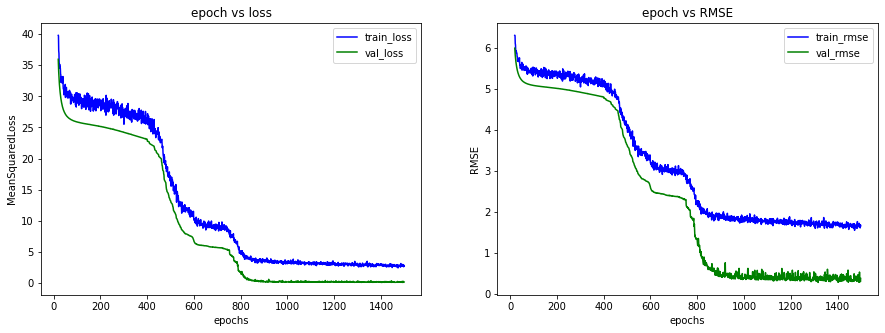

In [40]:
# plot epoch vs loss, epoch vs RMSE
plt.figure(figsize=(15,5))

epochs = len(model_history.history['loss'])

plt.subplot(1,2,1)
plt.plot(np.arange(20,1500,1), 
         model_history.history['loss'][20:1500], 
         '-', label='train_loss', color='b')
plt.plot(np.arange(20,1500,1), 
         model_history.history['val_loss'][20:1500], 
         '-', label='val_loss', color='g')
plt.xlabel('epochs')
plt.ylabel('MeanSquaredLoss')
plt.title('epoch vs loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(20,1500,1), 
         model_history.history['root_mean_squared_error'][20:1500], 
         '-', label='train_rmse', color='b')
plt.plot(np.arange(20,1500,1), 
         model_history.history['val_root_mean_squared_error'][20:1500], 
         '-', label='val_rmse', color='g')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('epoch vs RMSE')
plt.legend()
plt.savefig(os.path.join(out_dir,'05_1_epoch_vs_loss.png'))
plt.show()

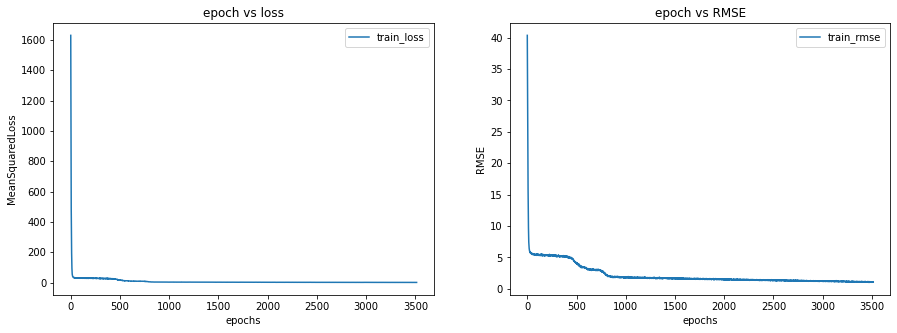

In [9]:
# plot epoch vs loss, epoch vs RMSE
plt.figure(figsize=(15,5))

epochs = len(model_history.history['loss'])

plt.subplot(1,2,1)
plt.plot(np.arange(0,epochs,1), model_history.history['loss'], '-', label='train_loss')
#plt.plot(np.arange(0,epochs,1), model_history.history['val_loss'], '--', label='val_loss', )
plt.xlabel('epochs')
plt.ylabel('MeanSquaredLoss')
plt.title('epoch vs loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0,epochs,1), model_history.history['root_mean_squared_error'], '-', label='train_rmse')
#plt.plot(np.arange(0,epochs,1), model_history.history['val_root_mean_squared_error'], '--', label='val_rmse')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('epoch vs RMSE')
plt.legend()
plt.savefig(os.path.join(out_dir,'05_epoch_vs_loss.png'))
plt.show()

In [10]:
#model.evaluate(test_dataset)

# Sample Reconstruction

In [11]:
# Reconstruct 
z_reconstruct = np.linspace(0,8.5,100)
z_reconstruct = np.expand_dims(strided_app(z_reconstruct, window_size, train_stride), axis=-1)

In [12]:
#z_reconstruct = z_reconstruct[:20]

In [13]:
mu_reconstruct = model.predict(z_reconstruct, batch_size=BATCH_SIZE)

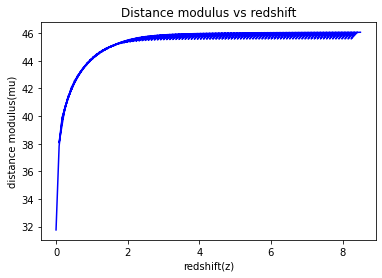

In [42]:
# plot reconstructed z vs mu
plt.plot(z_reconstruct.flatten(), mu_reconstruct.flatten(), color='b');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('Distance modulus vs redshift')
plt.savefig(os.path.join(out_dir,'06_sample_reconstruction.png'))
plt.show()

# Sample Reconstruction with uncertainity

In [15]:
model_u = model_uncertainity()

In [16]:
model_u.load_weights(os.path.join(out_dir,'cp.ckpt'))

In [17]:
model_u.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

In [18]:
mu_reconstruct_uncertainity = []
n = 1000
for i in range(n):
    mu_reconstruct_uncertainity.append(model_u.predict(z_reconstruct, batch_size=BATCH_SIZE).flatten())

mu_reconstruct_uncertainity = np.array(mu_reconstruct_uncertainity)
mean = np.mean(mu_reconstruct_uncertainity, axis=0)
std_dev = np.std(mu_reconstruct_uncertainity, axis=0)

/tmp/ipykernel_160131/3106310840.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(z, mu, yerr=mu_err, fmt='.r', label=dataset+' Sample', color='r');


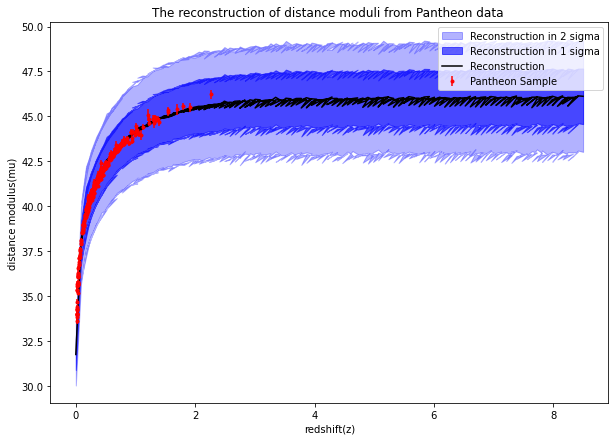

In [50]:
plt.figure(figsize=(10,7))
plt.fill_between(
    z_reconstruct.flatten(), 
    mean-2*std_dev, mean+2*std_dev,
    label='Reconstruction in 2 sigma',color='b', alpha=0.3)
plt.fill_between(
    z_reconstruct.flatten(), 
    mean-1*std_dev, mean+1*std_dev,
    label='Reconstruction in 1 sigma', color='b', alpha=0.6)

plt.plot(z_reconstruct.flatten(), mean, label='Reconstruction', color='k')
plt.errorbar(z, mu, yerr=mu_err, fmt='.r', label=dataset+' Sample', color='r');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('The reconstruction of distance moduli from '+dataset+' data ')
plt.legend()
plt.savefig(os.path.join(out_dir,'07_sample_reconstruction_with_uncertainity.png'))
plt.show()